# Signal processing

Theory
- Steven W. Smith - The Scientist and Engineer's Guide to Digital Signal Processing-California technical Publishing (1999).: Chapter 1, 2\*, 3\*, 8, 9, 10
- Steven L. Brunton, J. Nathan Kutz - Data-Driven Science and Engineering_ Machine Learning, Dynamical Systems, and Control 2nd Edition (Really good book, cover many kind of technique): Chapter 2\* for Fourier, Wavelet
- Alan V. Oppenheim Ronald W. Schafer - Discrete-Time Signal Processing
- https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Signals_and_Systems_(Baraniuk_et_al.)
- https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/12e6e5d7567fca2e993ef8563fef5a60_MIT6_003F11_lec21.pdf
- https://www.tutorialspoint.com/digital_signal_processing/index.htm \*
- https://www.intmath.com/fourier-series/fourier-intro.php
- https://ccrma.stanford.edu/~jos/sasp/Fourier_Transforms_Continuous_Discrete_Time_Frequency.html


Code
- https://mwickert.github.io/scikit-dsp-comm/
- https://www.kaggle.com/code/faressayah/signal-processing-with-python
- https://github.com/Thrifleganger/filter-basics
- https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
- https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

# Outline

- Introduction
    - Terminology: Quantization, Sampling, Domain eg. time domain, frequency domain, Common notation
- Convolution
- Fourier method
- Filtering
- Spectrogram
- Wavelet transform


# Motivation

- Health Data is Noisy and Complex. Health data scientists work with diverse data:

    - Physiological Signals: ECG, EEG, EMG, blood pressure, respiration, etc., are inherently time-series data, full of complex patterns and lots of noise.
    - Medical Images: CT, MRI, ultrasound, X-rays, microscopy images – these are essentially 2D or 3D signals.
    - Wearable Sensor Data: Continuous streams of data from smartwatches, fitness trackers, etc., measuring activity, heart rate, sleep patterns – again, time-series data.
    - Electronic Health Records (EHRs): While often textual, EHRs contain time-stamped events (medication administration, lab results) that can be treated as signals.
- Improved Machine learning model
    - Denoising signals using filters (designed with signal processing principles) before applying machine learning. Cleaner data leads to more accurate classification.
    - More advance features extraction lead to more accurate classification.

After this lecture, you will be able to:
- Clean and Prepare Data: Remove noise, artifacts, and unwanted components from raw signals.
- Transform Data: Convert data into representations that are more suitable for analysis (e.g., time-domain to frequency-domain).
- Features extraction

## Note on signal processing and time series analysis




Time series analysis, often found in the fields of statistics, econometrics and business, involves statistical techniques that deal with time series data, or data that is observed sequentially over time. Its more focusing on time-series forecasting, trend analysis, etc.

On the other hand, signal processing originate from field of electrical engineering. It involves more on techniques to improve the accuracy, efficiency, and effectiveness of communication and the processing of such signals. 

### Differences

Problems:

- signal processing: focus more on engineering and science problem.
- Time series analysis: focus more on business, financial and economic problem.

Data: 

- signal processing: Work with more **raw** data (more involve on technique to process the data or extracted the features). It also more involve with higher dimensional data (such as image) comparing to time series analysis.
- Time series analysis: Preprocessing not importance compare to signal processing.




# Introduction to Digital Signal Processing and System


## Signal


A signal is a description of how one parameter is related to another parameter.
For example, the most common type of signal in analog electronics is a voltage
that varies with time. Since both parameters can assume a continuous range
of values, we will call this a **continuous signal**.

In comparison, passing this signal (Continuous signal) through an analog-to-digital converter forces each of **the two parameters
to be quantized**. Signals formed from parameters that are *quantized* in this manner
are said to be **discrete signals** or **digitized signals**.


### Sampling and Quantization

**Sampling**: sampling is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave (a continuous signal) to a sequence of samples (a discrete-time signal)

**Quantization**: quantization is the process of mapping input values from large set (often continuous set) to output values in a (countable) smaller set, often with a finite number of elements. Rouding and Truncation are typical examples of quantization processes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import signal

# scipy is a package that build upon numpy, which have more build-in function
# for scientific computation


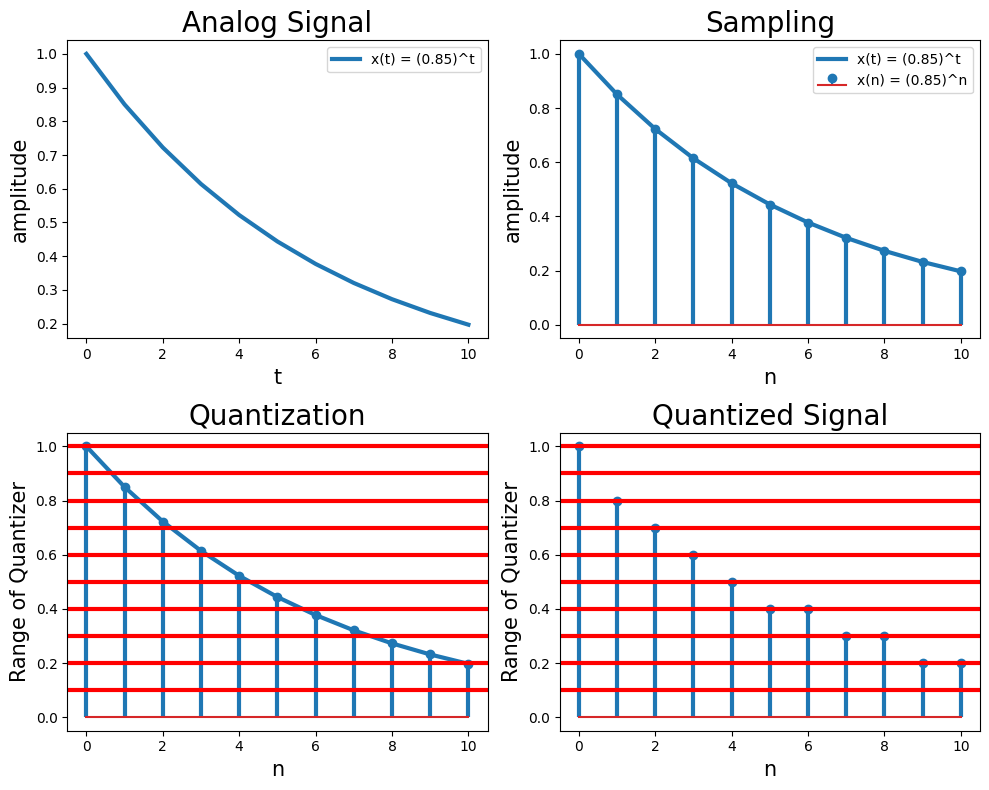

In [ ]:
t = np.arange(0, 11)
x = (0.85) ** t

plt.figure(figsize = (10,8)) # set the size of figure

# 1. Plotting Analog Signal
plt.subplot(2, 2, 1)
plt.title('Analog Signal', fontsize=20)

plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
plt.xlabel('t' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)
plt.legend(loc='upper right')

# 2. Sampling and Plotting of Sampled signal
plt.subplot(2, 2, 2)
plt.title('Sampling', fontsize=20)
plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
n = t

markerline, stemlines, baseline = plt.stem(n, x, label='x(n) = (0.85)^n')
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n' , fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.legend(loc='upper right')

# 3. Quantization
plt.subplot(2, 2, 3)
plt.title('Quantization', fontsize = 20)

plt.plot(t, x, linewidth =3)
markerline, stemlines, baseline=plt.stem(n,x)
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Range of Quantizer', fontsize=15)

plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)

plt.subplot(2, 2, 4)
plt.title('Quantized Signal', fontsize = 20)
xq = np.around(x,1)
markerline, stemlines, baseline = plt.stem(n,xq)
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Range of Quantizer', fontsize=15)

plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)

plt.tight_layout()

### Domain

Pay particular attention to the word: domain, a very widely used term in DSP.
For instance, a signal that uses time as the independent variable (i.e., the
parameter on the horizontal axis), is said to be in the **time domain**. Another
common signal in DSP uses frequency as the independent variable, resulting in
the term, **frequency domain**. Likewise, signals that use distance as the
independent parameter are said to be in the **spatial domain** (distance is a
measure of space).

Time domain, Frequency domain

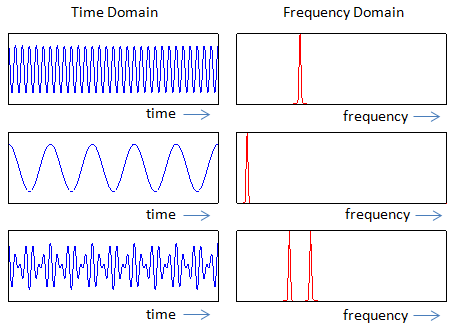

https://www.sharetechnote.com/html/RF_Handbook_TimeDomain_FrequencyDomain.html

Spatial domain

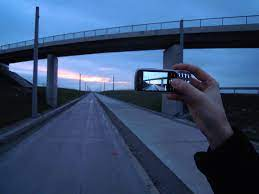

- Medical image: MRI, XRay
- EEG also can map to spatial domain

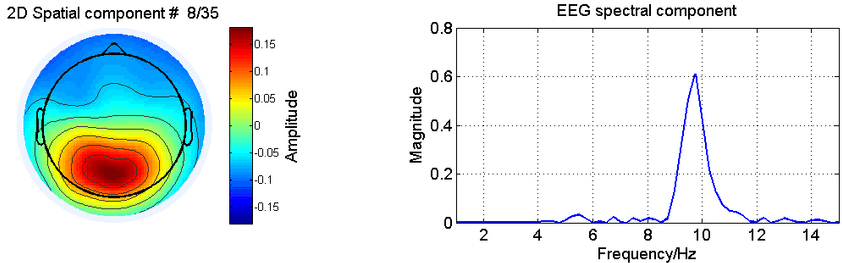

https://www.researchgate.net/figure/Spatial-component-spectral-component-and-multi-domain-feature-of-EEG-that-are-parallel_fig4_234066161

### Notation

Several rules are used for naming signals. It is not generic rule, but they are very common and you should memorize them. The
mathematics is difficult enough without a clear notation.

- Continuous signals use parentheses, such as $x(t)$, $y(t)$ while discrete signals use brackets $x[n]$, $y[n]$, for $n$ is integer.

continuous
$$x(t) = sin(2π f t)$$

discrete
$$x[n] = sin(2π f n * t_s)$$

for $t_s$ is the sample spacing

- Signals use lower case letters, $x[n]$. Upper case letters are reserved for the frequency domain, $X[m]$

### Basic signal operation

#### **Time Shift**

Time shift is done by adding or subtracting a quantity of the shift to the time variable in the function. 
- **Subtracting** a fixed positive quantity from the time variable will shift the signal to the **right** (delay) 
- **Adding** a fixed positive amount to the time variable will shift the signal to the **left** (advance) by the added quantity.

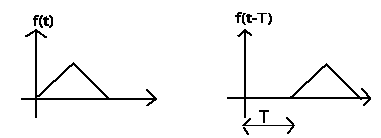

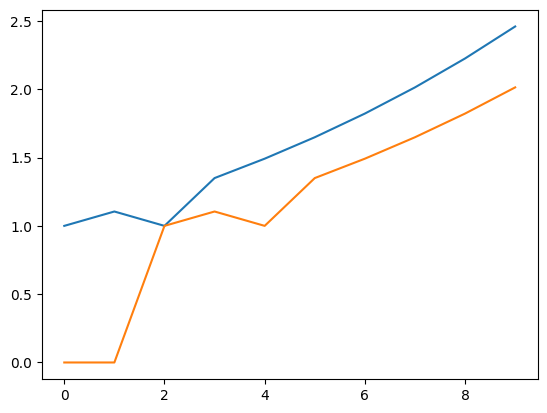

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 1)
signal = np.exp(x/10)
signal[2] = 1
def f(t, T = 0):
    if t-T < 0:
        return 0
    elif t-T > 9:
        return 0
    return signal[t-T]

test  = [f(i) for i in range(10)]

plt.plot(test)

test  = [f(i, 2) for i in range(10)]

plt.plot(test)

#### **Time Scaling**

Time scaling compresses or dilates a signal by multiplying the time variable by some quantity. 
- Quantity is **greater** than one, the signal becomes narrower and the operation is called **compression**
- Quantity is **less** than one, the signal becomes wider and is called **dilation**.

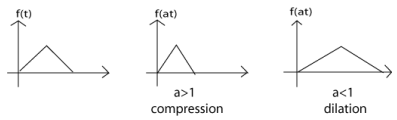

## A system

A system is any process that produces an output signal in response to an input signal. There are many reasons for wanting to understand a system. For example, you may want to design a system to remove noise in an electrocardiogram, sharpen an out-of-focus image, or remove echoes in an audio recording. In other cases, the system might have a distortion or interfering effect that you need to characterize or measure. For instance, when you speak into a telephone, you expect the other person to hear something that resembles your voice. Unfortunately, the input signal to a transmission line is seldom identical to the output signal. If you understand how the transmission line (the system) is changing the signal, maybe you can compensate for its effect. In still other cases, the system may represent some physical process that you want to study or analyze.

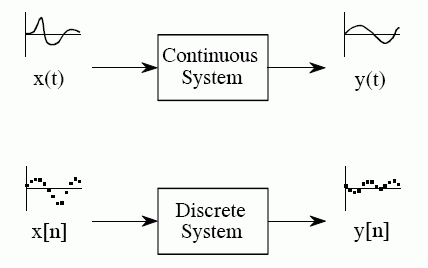

### System classification

1. **Continuous vs. Discrete**

A system in which the input signal and output signal both have continuous domains is said to be a continuous system. One in which the input signal and output signal both have discrete domains is said to be a discrete system. Of course, it is possible to conceive of signals that belong to neither category, such as systems in which sampling of a continuous time signal or reconstruction from a discrete time signal take place.

2. **Linear vs. Nonlinear**

A linear system is any system that obeys the properties of scaling (first order homogeneity) and superposition (additivity). A nonlinear system is any system that does not have at least one of these properties.


**Scaling**: input to a given system is scaled by a value, the output of the system is scaled by the same amount.

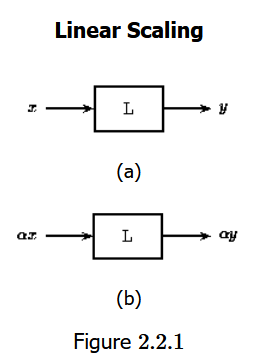

**Superposition**: This means that if two inputs are added together and passed through a linear system, the output will be the sum of the individual inputs' outputs.

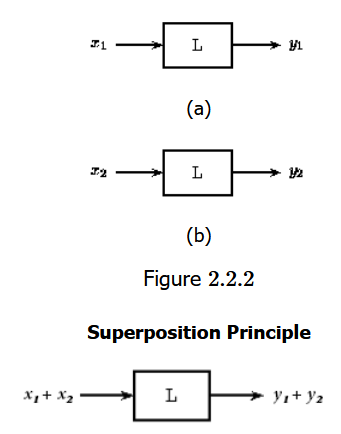

3. **Time Invariant vs. Time Varying**

For a time-invariant system, the output and input should be delayed by some time unit. Any delay provided in the input must be reflected in the output for a time invariant system.

Intuitively, that means that for any input function that produces some output function, any time shift of that input function will produce an output function identical in every way except that it is shifted by the same amount. Any system that does not have this property is said to be time varying.

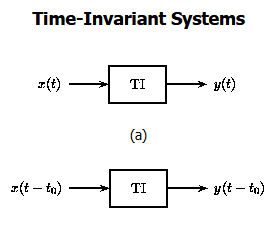

4. **Stable vs Unstable system**

Stable System:
A system is considered stable if its output remains bounded for any **bounded input**. In other words, when a stable system is subjected to a finite input, it produces a finite output that does not grow unbounded over time. Mathematically, for a system to be stable, if the input $x(t)$ is bounded such that $∣x(t)∣≤M$ for all $t$ and some finite $M$, then the output $y(t)$ should also be bounded by some finite value $N$.

$$∣x(t)∣≤M < \infty$$

$$∣y(t)∣ ≤N < \infty$$

Unstable System:
A system is considered unstable if its output grows without bound in response to a bounded input. In other words, even if the input remains finite, the output of an unstable system can increase indefinitely over time. Mathematically, if there exists a bounded input $x(t)$ such that the output $y(t)$ becomes unbounded as tt approaches infinity, then the system is unstable.

5. **Causal vs non-casual system**

A system is considered causal if its output relies solely on the current and past inputs, without being influenced by any future inputs.

Example 1: $y(n) = 2 x(t) + 3 x(t-3)$

Example 2: $y(n) = 2 x(t) + 3 x(t-3) + 6x(t + 3)$

6. **Memoryless system**

A system is described as memoryless if, at each value of nn, the output $y[n]$ depends only on the input $x[n]$ at that same value of $n$.

Example memoryless: $y[n] = (x[n])^2$

Example memory system: RNN, LSTM

# Convolution and cross correlation

Convolution is a mathematical operation used to express the relation between input and output of an Linear time invariance (LTI) system. It relates input, output and impulse response of an LTI system as

$$
y(t) = x(t) * h(t)
$$

Where 

- $y (t)$ = output of LTI
- $x (t)$ = input of LTI
- $h (t)$ = impulse response of LTI

Mathematically, **continuous convolution** can be write as:

$$
x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau)h(t - \tau) d\tau
$$

**Convolution animation**: https://www.youtube.com/watch?v=C1N55M1VD2o
#### Convolution Example

https://phiresky.github.io/convolution-demo/

https://github.com/phiresky/convolution-demo


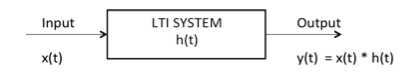

and **discrete convolution** can be write as:

$$
x[n] * h[n] = \sum_{k = -\infty}^{\infty} x[k]h[n-k] 
$$

for $k$ is integer


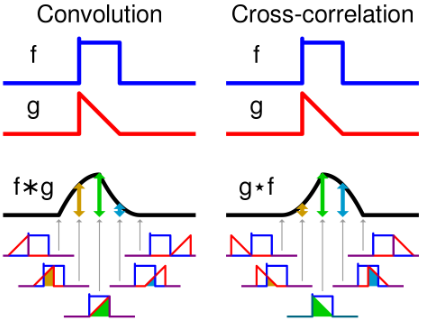

Cross correlation is similar to convolution but the signal is not flip

**Correlation**

$$
x[n] * h[n] = \sum_{k = -\infty}^{\infty} x[k]h[n+k] 
$$

## Dirac delta function (Unit Impulse function)

### continuous-time unit impulse

The continuous-time unit impulse signal is denoted by $δ(t)$ and is defined as

$$
δ(t)=
\begin{cases}
\infty& \text{for}\;x=0 \\
0& \text{for}\; x\ne 0
\end{cases}
$$

and

$$
\int_{-\infty}^{\infty} \delta(t) = 1

$$


Hence, by the definition, the unit impulse signal has zero amplitude everywhere except at t = 0. At the origin (t = 0) the amplitude of impulse signal is infinity so that the area under the curve is 1. The continuous-time impulse signal is also called Dirac Delta Signal.

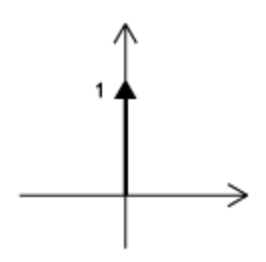

###  Discrete time unit impulse


The discrete-time unit impulse signal is denoted by $δ[n]$ and is defined as

$$
δ[n]=
\begin{cases}
1& \text{for}\;x=0 \\
0& \text{for}\; x\ne 0
\end{cases}
$$


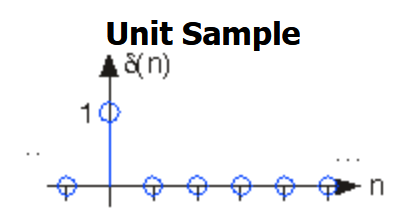

### Property

$$
\int_{-\infty}^{\infty} x(\tau) * \delta(t-\tau) d\tau = x(t)
$$

$$
∑^∞_{k=−∞}x[k]δ[n-k]=x[n]
$$

## Impulse response

The response generated by a system when subjected to a unit impulse input is referred to as the impulse response. Similar to how input and output signals are commonly denoted as $x[n]$ and $y[n]$, respectively, the impulse response is typically represented by the symbol $h[n]$.

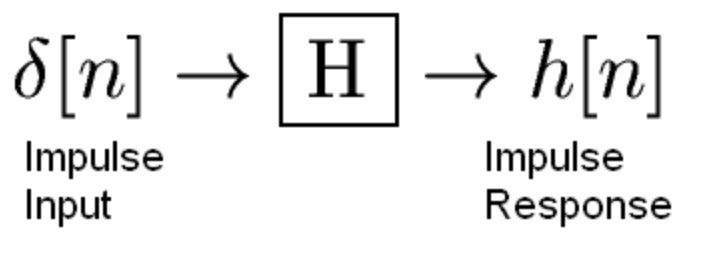


Any impulse can be expressed as a delta function that has been both shifted and scaled. Take, for instance, a signal denoted as $a[n]$, where all samples are zero except for sample number 6, which has a value of 4. This is equivalent to a delta function shifted six samples to the right and multiplied by 4. In mathematical terms, it can be represented as $a[n] = 4δ[n-6]$.

### Why impulse response is important

- First, the input signal can be decomposed into a set of impulses, each of which can be viewed as a scaled and shifted delta function. 
- Second, the output resulting from each impulse is a scaled and shifted version of the impulse response. 
- Third, the overall output signal can be found by adding these scaled and shifted impulse responses. 

In other words, Consider a **linear time variance system**, **if we know a system's impulse response**, **then we can calculate what the output will be for any possible input signal**. This means we know everything about the system. There is nothing more that can be learned about a linear system's characteristics. (However, in later chapters we will show that this information can be represented in different forms). 

The impulse response goes by a different name in some applications. If the system being considered is a filter, the impulse response is called the **filter kernel**, the **convolution kernel**, or simply, the kernel. In image processing, the impulse response is called the **point spread function**. While these terms are used in slightly different ways, they all mean the same thing, **the signal produced by a system when the input is a delta function**.

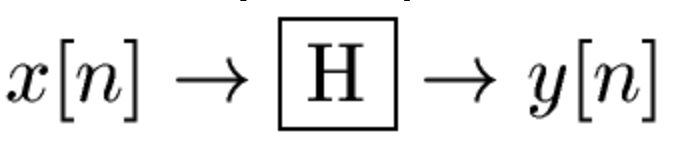

Since we know the response of the system to an impulse and any signal can be decomposed into impulses, all we need to do to find the response of the system to any signal is to decompose the signal into impulses, calculate the system's output for every impulse and add the outputs back together. This is the process known as Convolution.

## Applications

- **Pharmacokinetic/pharmacodynamic (PK/PD)** modeling describes how a drug is absorbed, distributed, metabolized, and eliminated by the body (PK), and how the drug concentration relates to its effect (PD). The body's response to a drug can often be modeled as an LTI system. The drug input (dosage regimen) can be considered the input signal, and the drug concentration in the blood or the physiological effect can be considered the output signal. Convolution can be used to model the drug's concentration-time profile, based on its impulse response (which represents the body's inherent handling of the drug).
- **Deconvolution Microscopy**: Even with high-quality microscopes, images are blurred due to the diffraction of light. This blurring can be modeled as a convolution of the true object with the microscope's Point Spread Function (PSF). The PSF is essentially the impulse response of the microscope. Deconvolution is the process of trying to reverse this blurring. It's an inverse problem, and often ill-posed (small changes in the input can lead to large changes in the output). Iterative deconvolution algorithms, which often involve repeated convolutions and other operations, are used to estimate the true object. https://www.youtube.com/watch?v=yNOPIVnsot8

![de_conv_micro.png](pictures/de_conv_micro.png)

ref image: https://evidentscientific.com/en/microscope-resource/knowledge-hub/digital-imaging/deconvolution/deconalgorithms

- **Deep learning (CNN)**
- **Visual microphone**: https://www.youtube.com/watch?v=FKXOucXB4a8&pp=ygURdmlzdWFsIG1pY3JvcGhvbmU%3D


## Example

Convolution

$$
∑^∞_{k=−∞}arr1[k]arr2[n-k]=output[n]
$$

$$
... +arr1[0]arr2[n-0]+arr1[1]arr2[n-1]+arr1[2]arr2[n-2] + ...=output[n]
$$

The below equation is call difference equation. You can compare this to differential equation in continuous system.

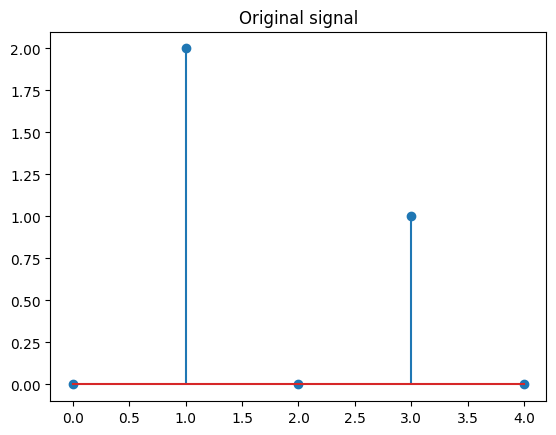

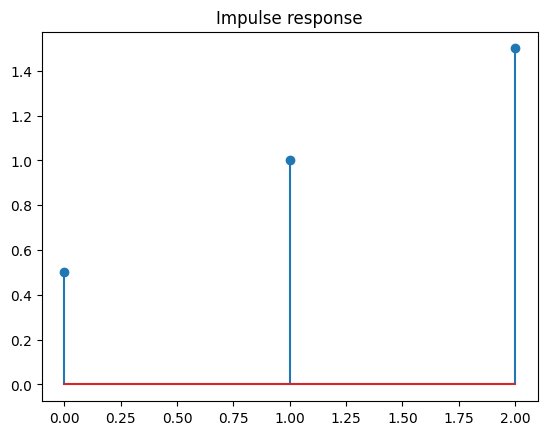

Text(0.5, 1.0, 'Convolution results')

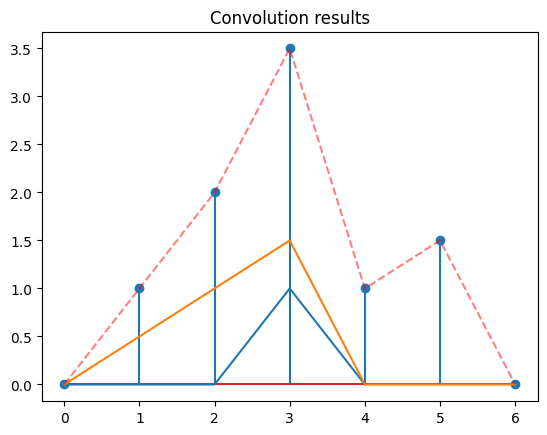

In [227]:

import numpy as np 
import matplotlib.pyplot as plt
# Creating two numpy One-Dimensional 
# array using the array() method 
arr1 = np.array([0, 2, 0, 1, 0]) 
plt.stem(arr1)
plt.title("Original signal")
plt.show()
arr2 = np.array([0.5, 1, 1.5])
plt.stem(arr2)
plt.title("Impulse response")
plt.show()

output = np.convolve(arr1, arr2)
plt.stem(output)

impulse1 = np.array([0, 0, 0, 1, 0]) 
output1 = np.convolve(impulse1, arr2)

plt.plot(impulse1)

impulse2 = np.array([0, 1, 0, 0, 0]) 
output2 = np.convolve(impulse2, arr2)

plt.plot(output2)

plt.plot(output1 + output2*2, 'r--', alpha = 0.5)
plt.title("Convolution results")

# Block diagram

Block diagrams are essential because they provide a visual representation of the computational structure of a system. They help in understanding the flow of signals through the system and the interconnections between different components or stages. This visual representation is crucial for analyzing and designing systems, especially complex ones like linear constant-coefficient difference equations representing LTI causal systems. Block diagrams simplify the process of understanding and communicating system functionality and aid in the implementation and troubleshooting of systems.

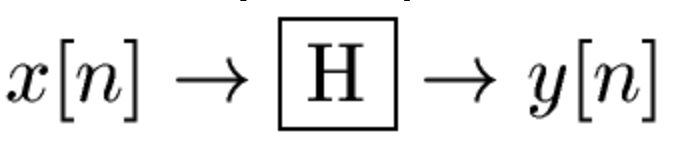

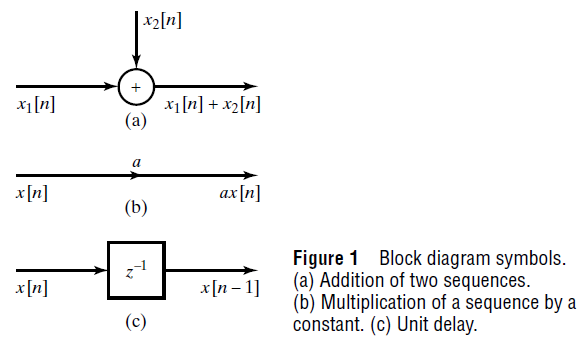


(a). $x_1[n] + x_2[n] = output = y[n]$

(b). $ax[n]  = output = y[n]$

(c). $x_1[n-1] = output = y[n]$




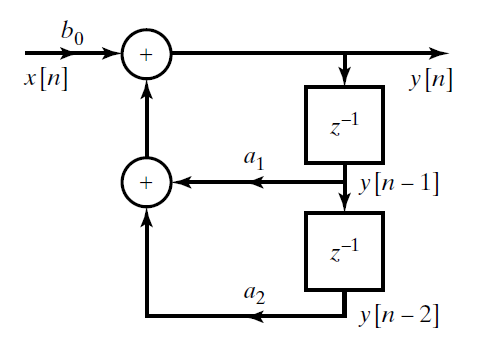

$$y[n] = x[n] + a_1 y[n-1]+a_2y[n-2]$$

**Can anyone give me example of the system that should have delay operation of output as input (can be call feedback) in medicine?**

## How about convolution?

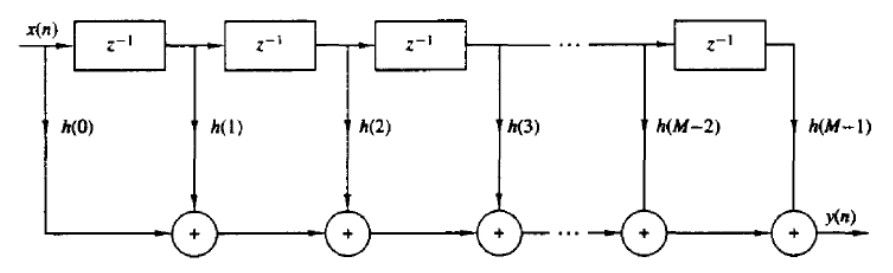

$$
∑^∞_{k=−∞}h[k]x[n-k]=x[n]
$$

# Fourier transform

Fourier transforms are mathematical tools that transform signals from the time domain to the frequency domain. By converting a signal into its frequency components, it becomes easier to analyze the behavior of the system generating the signal.

A signal can be either continuous or discrete, and it can be either periodic (finite time duration) or aperiodic (infinite time duration).

NOTE: For the picture below, you can see that discrete time signal not using brakets.

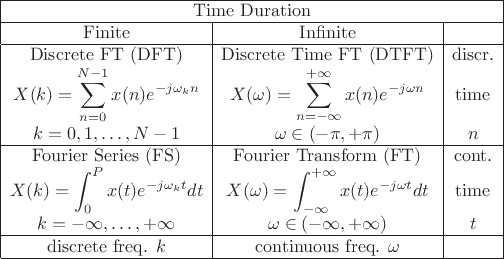

![image.png](pictures/ft.png)

ref image: https://programmersought.com/article/37643131481/

#### Fourier family

1. Periodic-Continuous: Fourier Series
2. Aperiodic-Continuous: Fourier Transform
3. Aperiodic-Discrete: Discrete Time Fourier Transform
4. Periodic-Discrete: Discrete Fourier Transform

## Fourier series

We are aiming to find an approximation of **perioodic function** using **trigonometric functions** for various square, saw tooth, etc waveforms. We do this by adding more and more trigonometric functions (eg. cos and sin) together. The sum of these special trigonometric functions is called the **Fourier Series**.

Let function f(t) that is a **periodic function** with period $T$ can be written in the form of summation of sines and cosines functions multipled by a **coefficient**. A coefficient tell you "*How much of a specific trigonometric functions in there*".

$$f(t) = \frac{a_0}{2} + \sum^∞_{n= 1}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) )$$

with some algebratic manipulation using Euler's formula ($e^{iθ} = \text{cos}θ + i\text{sin}(θ)$)


> $$f(t) =\sum^∞_{n= -∞} c_n e^{i2πnt/T} $$

A **periodic function** is a function that repeats its values at regular intervals or periods.

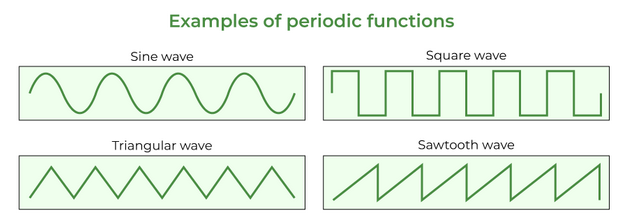

#### Fourier series Example

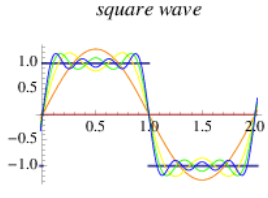

Click this for example

> https://www.intmath.com/fourier-series/fourier-graph-applet.php

- https://tikz.net/fourier_series/

#### Intuition

You can view a function as vector of infinite dimension. You know that to construct a N dimensional vector you need N independent vector to from a space of N dimension. Then N dimensional vector can be written in the from of linear combination of basis vector. You can check the independent of sin and cos function by calculating the inner product eg.

$$\int_{-\inf}^{∞} f(x)g(x) dx$$


### Fourier coefficient

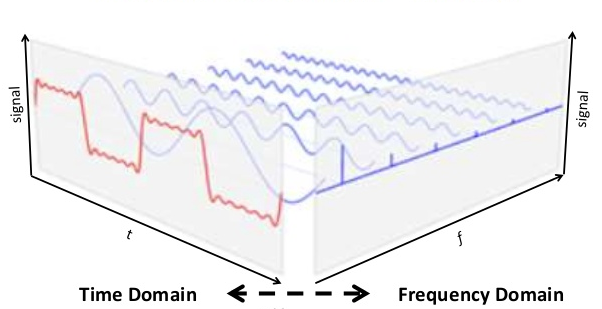



Fourier series

$$f(t) = \frac{a_0}{2} + \sum^∞_{n= 1}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) ) \tag{1}$$


$$f(t) =\sum^∞_{n= -∞} c_n e^{i2πnt/T} \tag{2}$$

Because cosine $cos(\frac{2πn}{T}t)$, $cos(\frac{2πm}{T}t)$ and sin are orthogocal to each other when $n \neq m$. We can fine $a_n$, $b_n$ by take inner product to remove all the term that we not interested in. For example, we want to find $a_1$.

$$
\int_0^{T} cos(\frac{2π}{T}t) f(t) dt = \int_0^{T} cos(\frac{2π}{T}t) * [ \frac{a_0}{2} + \sum^∞_{n= 1}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) )] dt
$$

$$
a_1 = \frac{\int_0^{T} cos(\frac{2π}{T}t) f(t) dt}{\int_0^{T} cos(\frac{2π}{T}t)^2} =
 \frac{2}{T} \int_0^{T} cos(\frac{2π}{T}t) f(t) dt
$$

#### Summary

In summary, using the same method, for the fourier series in cosine and sine term, $ f(t) = \frac{a_0}{2} + \sum^∞_{n= 1}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) )  $, you can find the coefficient $a_n$ and $b_n$ by

$$a_0 =
 \frac{2}{T} \int_0^{T} f(t) dt
$$


$$a_n =
 \frac{2}{T} \int_0^{T} cos(\frac{2πn}{T}t) f(t) dt
$$

$$b_n =
 \frac{2}{T} \int_0^{T} sin(\frac{2πn}{T}t) f(t) dt
$$

and $c_n$ for $f(t) =\sum^∞_{n= -∞} c_n e^{i2πnt/T}$ by

$$c_n =
 \frac{1}{T} \int_0^{T} e^{-\frac{i2\pi nt}{T}} f(t) dt
$$


## Fourier Transform (FT)

When $f(t)$ is not a periodic function, we can use fourier transform. Denote that fourier transform ($\mathcal{F}$) of $f(t)$ can be written by

$$
\mathcal{F}(f(t)) = F(μ)
$$.

and inverted fourier transform can be written by

$$
\mathcal{F}^{-1}(F(μ)) = f(t)
$$

Relation to fourier series

$$
f(t) = \sum^∞_{n= -∞} c_n e^{i2πnt/T}
$$

we can find fourier series of $f(t)$ ($f(t)$ can be non-periodic function) by let $T → ∞$ and $\mu = \frac{n}{T}$

> $$f(t) = ∫^{∞}_{-∞} F(μ) e^{j2πμt} dμ \tag{1}$$

Then we can find $F(μ)$ by .

> $$F(μ) = ∫^{∞}_{-∞} f(t)e^{-j2πμt} dt \tag{2}$$

Equation (1) and (2) are related to each other which called Fourier transform pair, denote as $f(t) ⇔ F(μ)$.  The double arrow indicates that the expression on the right is obtained by taking the forward Fourier transform of the expression on the left, while the expression on the left is obtained by taking the inverse Fourier transform of the expression on the right.

### Amplitude and Phase

In the context of Fourier analysis, since the results of fourier transform are complex number, the amplitude and phase of a signal are components that describe how the signal can be represented as a sum of sinusoids. 

for instant

$$f(t) = ∫^{∞}_{-∞} F(μ) e^{j2πμt} dμ \tag{1}$$

- $|F(\mu)|$ can be interpret as amplitude of the wave that have frequency $\mu$
- $deg(F(\mu))$ can be interpret as phase of the wave that have frequency $\mu$


### Fourier transform property

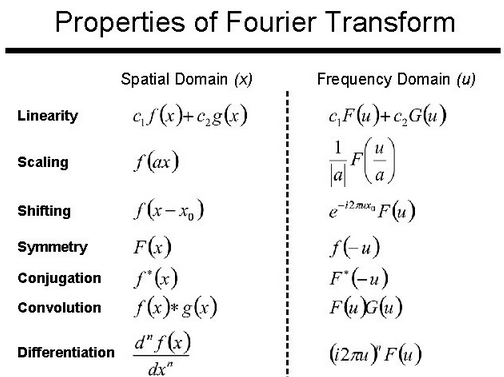

https://math.libretexts.org/Bookshelves/Differential_Equations/Introduction_to_Partial_Differential_Equations_(Herman)/09%3A_Transform_Techniques_in_Physics/9.05%3A_Properties_of_the_Fourier_Transform

## Sampling theorem (Nyquist sampling theorem)

The discrete signal $f[n]$ can be view as $f[n] = f(nT)$

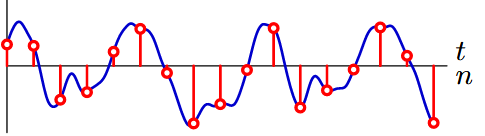

The process of reconstruction, produces a continuous time signal, $f(t)$, that would sample to a given discrete time signal, $f[n]$, at a specific sampling rate. Reconstruction can be done by first multiply impulse train to the discrete signal $f[n]$.

$$
f'(t) =   ∑^∞_{n = -∞} f[n] δ(t-nT)
$$

$$
f'(t) =   ∑^∞_{n = -∞} f(nT) δ(t-nT)
$$

$$
f'(t) =  f(t)  ∑^∞_{n = -∞} δ(t-nT)
$$


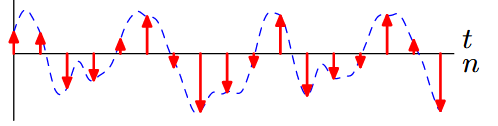

After this we can use Low pass filter to reconstruct the signal. I will show you why.

Suppose the fourier transform of signal $f(t)$ is

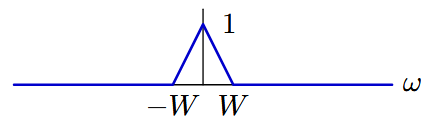

And the fourier transform of signal $∑^∞_{n = -∞} δ(t-nT) $ is

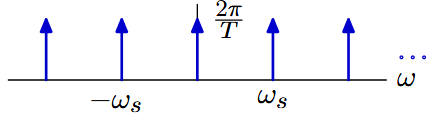

You can get fourier transform of the $f'(t)$ by convolve fourier transform of $f(t)$ with fourier transform of $∑^∞_{n = -∞} δ(t-nT) $



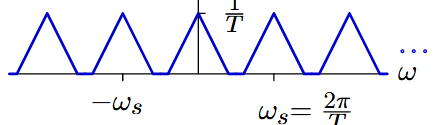

You can see that, in order to get the original signal $f(t)$ from $f[n]$ all you need to do is using low pass filter (let only lower frequency pass).

You can try the interactive convolution here.

https://phiresky.github.io/convolution-demo/

**The Sampling Theorem**, also known as the Nyquist-Shannon Sampling Theorem, is a fundamental concept in signal processing and digital signal processing (DSP). It provides guidelines for accurately representing continuous-time signals in a discrete form. The theorem is named after Harry Nyquist and Claude Shannon, who independently formulated and developed these ideas.

The Sampling Theorem can be stated as follows:

> "If a continuous-time signal is sampled at a rate greater than twice its maximum frequency (or, equivalently, if the sampling frequency is at least twice the bandwidth of the signal), then the original continuous-time signal can be perfectly reconstructed from its discrete samples."

$$f_N > 2f_{max}$$

for $f_N$ is theoretical minimum sampling rate (Nyquist rate) according to the sampling theorem and $f_{max}$ is the maximum frequency present in that signal.

https://phiresky.github.io/convolution-demo/

## Discrete time fourier transform (DTFT)

DTFT can be view as the fourier transform of the impulse reconstruction of discrete signal $f[n]$. Therefore, the fourier transform of impulse reconstruction of discrete signal can be written as

$$F(\mu) = ∫^∞_{-∞} ∑^∞_{n = -∞} f(t) δ(t-nT) e^{-i2πμt} dt$$
$$F(\mu) = ∑^∞_{n = -∞} f(nT) e^{-i2πμnT}  = ∑^∞_{n = -∞} f[n] e^{-i2πμnT}$$

for $\mu \in \{ -1/T, 1/T \}$

## Discrete fourier transform (DFT)

You can view DFT as DTFT with sampling in frequency domain

## Fast fourier transform (FFT)

From wikipedia https://en.wikipedia.org/wiki/Fast_Fourier_transform

> Fast Fourier transforms are widely used for applications in engineering, music, science, and mathematics. The basic ideas were popularized in 1965, but some algorithms had been derived as early as 1805. In 1994, Gilbert Strang described the FFT as "the most important numerical algorithm of our lifetime", and it was included in Top 10 Algorithms of 20th Century by the IEEE magazine Computing in Science & Engineering.



A fast Fourier transform (FFT) is an algorithm that computes the discrete Fourier transform (DFT). Evaluating original DFT directly requires $O ( n^2 )$  operations: there are $n$ outputs of $F_k$ , and each output requires a sum of $n$ terms. An FFT is any method to compute the same results in $O ( n \log n )$ operations. All known FFT algorithms require $O ( n log ⁡ n )$ operations, although there is no known proof that lower complexity is impossible.

## Fourier application

- spectroscopy

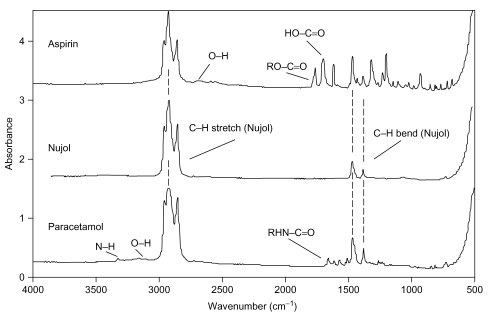

https://www.analyticaltoxicology.com/en/infra-red-spectroscopy/

- CT image reconstruction (Radon transform): The raw data acquired by the scanner is NOT a direct image.

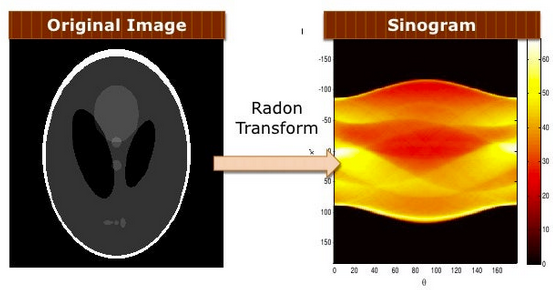

- Electroencephalography (EEG) measures brain electrical activity, and electrocardiography (ECG) measures heart electrical activity. These signals are often contaminated with noise (e.g., muscle artifacts, power line interference). Convolution with various filters (low-pass, high-pass, band-pass, notch filters) is a fundamental technique for removing noise and isolating specific frequency bands of interest. For example, a low-pass filter (implemented via convolution) can remove high-frequency noise from an ECG signal. A moving average filter (a simple form of convolution) is also a common smoothing technique.

![eeg_filter.png](pictures/eeg_filter.png)

ref image: https://www.researchgate.net/figure/Original-EEG-signal-and-its-stepwise-filtering-effect-according-to-the-proposal-on-the_fig3_342222692

- Features extraction to use in machine learning:
    - Spectrogram
    - Frequency

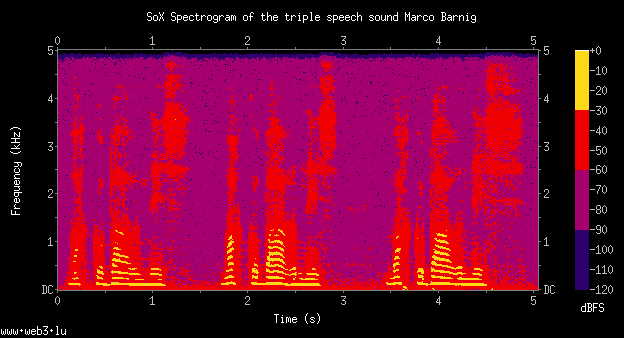

https://www.web3.lu/spectrogram-speech-processing/

## Fourier Coding

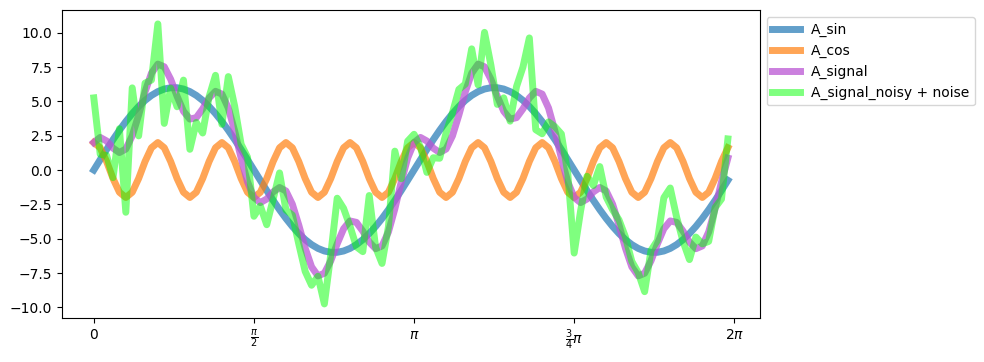

In [ ]:
# Create some signal
import numpy as np
import matplotlib.pyplot as plt

# define frequencies, amplitudes, and sampling rate and time array:
f1 =  2  # Frequency 1 in Hz
f2 = 10  # Frequency 2 in Hz
A1 = 6   # Amplitude 1
A2 = 2   # Amplitude 2
Fs = 100 # Sampling rate
t  = np.arange(0,1,1/Fs)

# calculate prime signals:
A_sin = A1 * np.sin(2 * np.pi * f1 * t)
A_cos = A2 * np.cos(2 * np.pi * f2 * t)
A_signal = A_sin + A_cos

# add some noise:
np.random.seed(1)
A_Noise = 2
Noise = np.random.randn(len(t)) * A_Noise
A_signal_noisy = A_signal + Noise

# plots:
fig=plt.figure(3, figsize=(9,4))
plt.plot(t, A_sin, label="A_sin", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="A_cos", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=5, c="mediumorchid",
         label="A_signal", alpha=0.75)
plt.plot(t, A_signal_noisy, lw=5, c="lime",
         label="A_signal_noisy + noise", alpha=0.5)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1],
           ["0", r"$\frac{\pi}{2}$", r"$\pi$",
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.show()

Number of A_signal samples:  100
Number of A_signal_fft samples:  100
Number of frequencies samples:  100


Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

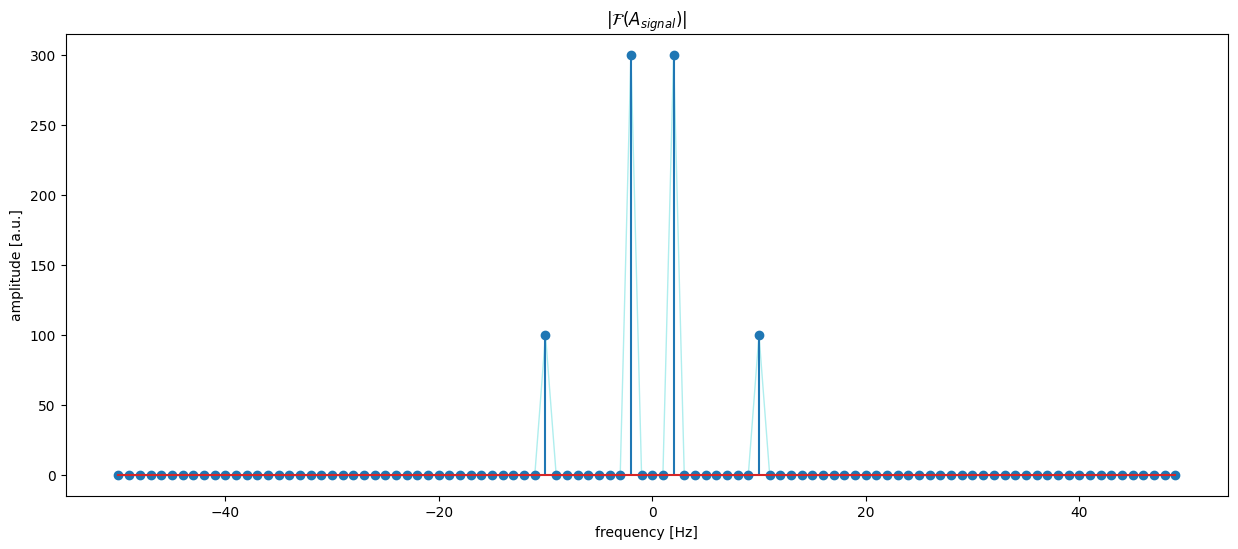

In [ ]:
# fourier transform

import scipy.fft

print("Number of A_signal samples: ", np.size(A_signal))

A_signal_fft = scipy.fft.fft(A_signal)

print("Number of A_signal_fft samples: ", np.size(A_signal_fft))

frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)

print("Number of frequencies samples: ", np.size(frequencies))

# Amplitude plot
fig=plt.figure(2, figsize=(15,6))
plt.plot(frequencies, np.abs(A_signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(A_signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

c:\ProgramData\Anaconda3\envs\panu\dream_mne\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\Anaconda3\envs\panu\dream_mne\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


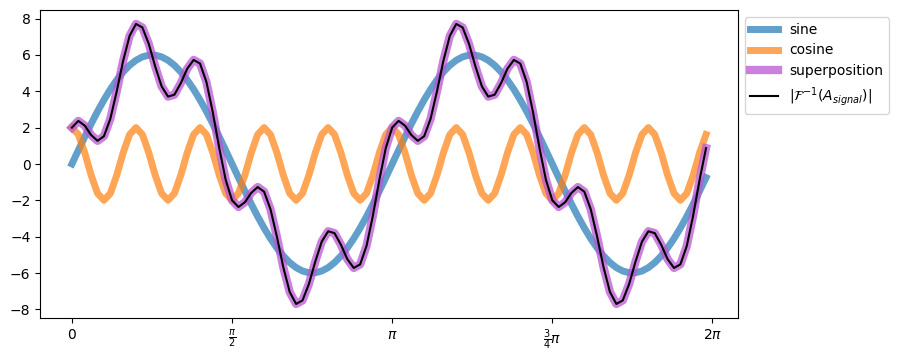

In [ ]:
# inverted fourier transform

A_signal_ifft = scipy.fft.ifft(A_signal_fft)

fig=plt.figure(4, figsize=(9,4))
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=6, c="mediumorchid",
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_ifft,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1],
           ["0", r"$\frac{\pi}{2}$", r"$\pi$",
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.show()

Number of A_signal_fft samples:  100


Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

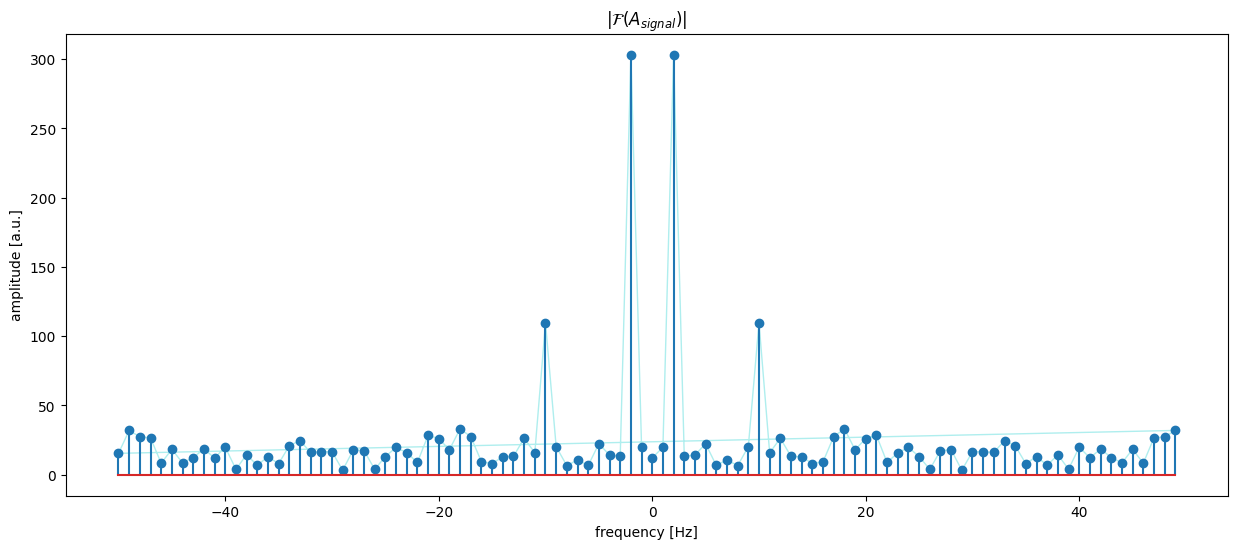

In [ ]:
# fourier transform

import scipy.fft

A_signal_noisy_fft = scipy.fft.fft(A_signal_noisy)

print("Number of A_signal_fft samples: ", np.size(A_signal_noisy_fft))

frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)

denoise_signal = A_signal_noisy.copy()
denoise_signal[np.abs(frequencies) > 20] = 0

# Amplitude plot
fig=plt.figure(2, figsize=(15,6))
plt.plot(frequencies, np.abs(A_signal_noisy_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(A_signal_noisy_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

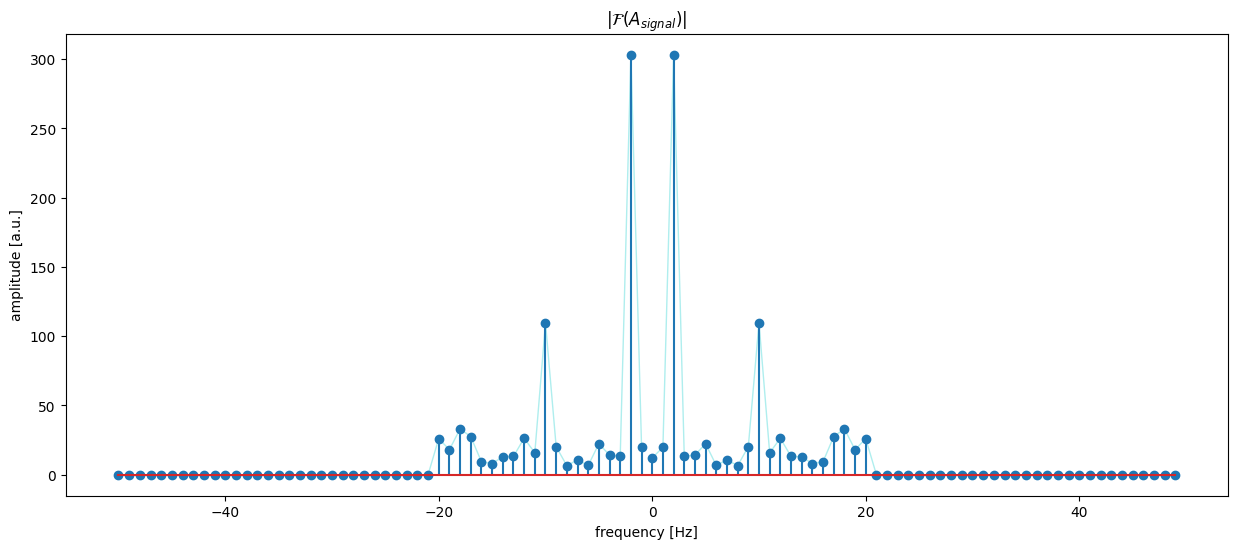

In [ ]:
# fourier transform

import scipy.fft


denoise_signal = A_signal_noisy_fft.copy()
denoise_signal[np.abs(frequencies) > 20] = 0

# Amplitude plot
fig=plt.figure(2, figsize=(15,6))
plt.plot(frequencies, np.abs(denoise_signal), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(denoise_signal))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

c:\ProgramData\Anaconda3\envs\panu\dream_mne\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\Anaconda3\envs\panu\dream_mne\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


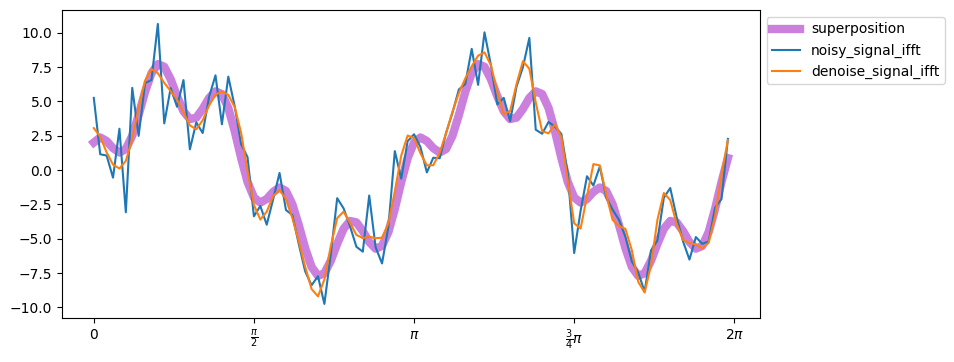

In [ ]:
# inverted fourier transform
denoise_signal_ifft = scipy.fft.ifft(denoise_signal)
A_signal_noisy_fft_ifft = scipy.fft.ifft(A_signal_noisy_fft)

fig=plt.figure(4, figsize=(9,4))
plt.plot(t, A_signal, lw=6, c="mediumorchid",
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_noisy_fft_ifft,
         label="noisy_signal_ifft")
plt.plot(t, denoise_signal_ifft,
         label="denoise_signal_ifft")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1],
           ["0", r"$\frac{\pi}{2}$", r"$\pi$",
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.show()

# Digital Filter

Digital filters are crucial in DSP, greatly contributing to its widespread use. They primarily serve two purposes: signal separation and signal restoration. Signal separation is essential when a signal is contaminated with noise or other interferences. For example, in measuring a baby's heart activity via EKG in the womb, the mother's heartbeat and breathing might corrupt the signal, necessitating a filter to isolate and analyze these signals separately. Signal restoration is used to correct distortions in signals, such as enhancing an audio recording made with subpar equipment or deblurring an image taken with a shaky camera or out-of-focus lens.


## Filter classification

1. Based on Impulse Response

- Finite Impulse Response (FIR) Filters: These filters have a finite number of non-zero terms in their impulse response. They are inherently stable and can be designed to have a linear phase response.
- Infinite Impulse Response (IIR) Filters: These filters have an impulse response that theoretically extends infinitely. They are more efficient than FIR filters in terms of the number of coefficients needed for a similar frequency response but can be unstable if not designed carefully.


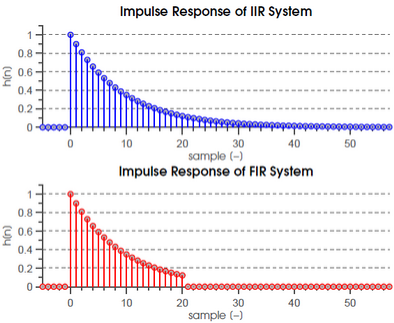

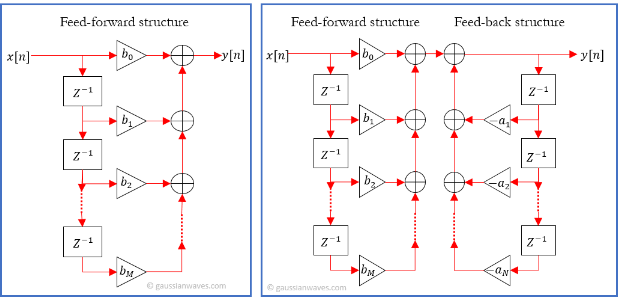


2. Based on Frequency Response
- Low-Pass Filters: Allow frequencies below a certain cutoff to pass through while attenuating frequencies above the cutoff.
- High-Pass Filters: Allow frequencies above a certain cutoff to pass through while attenuating frequencies below the cutoff.
- Band-Pass Filters: Allow a band of frequencies to pass through and attenuate frequencies outside this band.
- Band-Stop Filters (Notch Filters): Attenuate a band of frequencies while allowing frequencies outside this band to pass through.


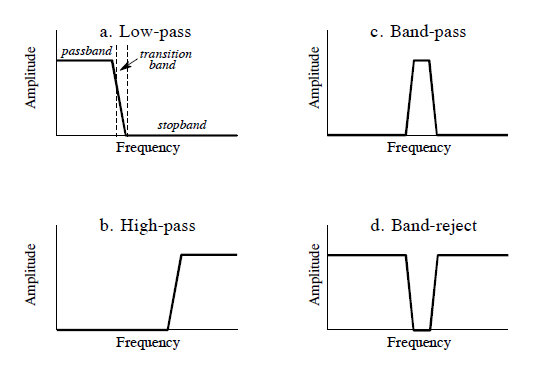

## Moving average filter

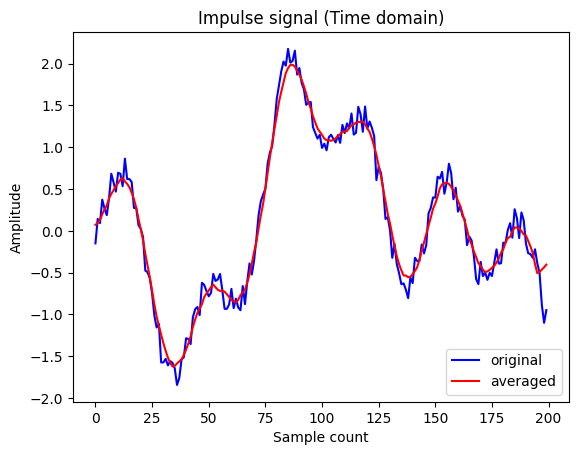

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

length = 200
array = np.linspace(-np.pi, np.pi, length)
signal = np.sin(1.3*array+1.2) + 0.7 * np.sin(2.4*array+2.3) + 0.6 * np.sin(5.7*array+4.3)
noise = np.random.rand(length) * 0.4
noisy_signal = signal + noise

plt.plot(noisy_signal, 'b-', label='original')
plt.plot(moving_average(noisy_signal, 10), 'r-', label='averaged')
plt.xlabel('Sample count')
plt.ylabel('Amplitude')
plt.title("Impulse signal (Time domain)")
plt.legend(loc="lower right")


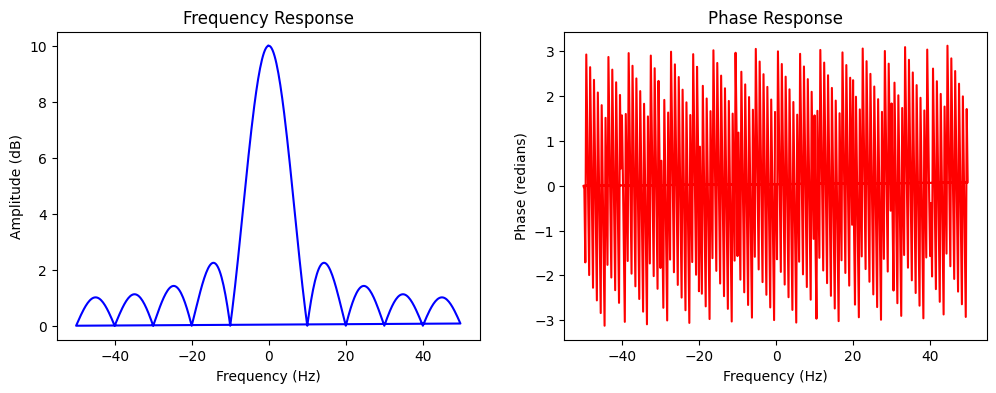

In [8]:

import scipy.fft

sampling_rate = 100
filter = np.zeros(length*2)
filter[length//2:length//2+10] = 1
spectrum = scipy.fft.fft(filter)

x = scipy.fft.fftfreq(length*2, 1/sampling_rate)

# x = np.linspace(0, spectrum.size * sample_rate  / 2 , spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = np.abs(spectrum)

ax.plot(x, y, 'b')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.angle(spectrum)
ax.plot(x, y, 'r')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (redians)')
ax.set_title("Phase Response")

plt.show()

### Linear phase

In signal processing, linear phase refers to a property of a filter where the phase response is a linear function of frequency. Essentially, all frequency components of the input signal experience the same constant time shift (usually a delay), known as the group delay. This means there’s no phase distortion due to time delays between frequencies.

Text(0, 0.5, 'Phase (redians)')

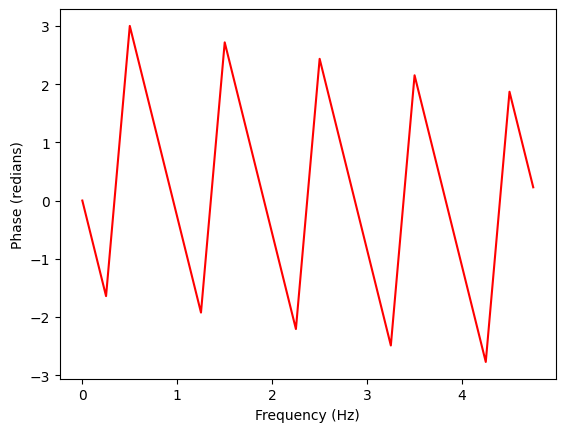

In [9]:

plt.plot(x[:20], y[:20], 'r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (redians)')


Two frequency shift at different phase but same time delay

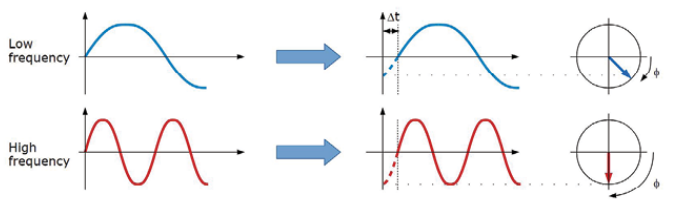

ref: https://circuitcellar.com/research-design-hub/group-delay-basics-more-filter-fun/

Linear phase vs Non linear phase

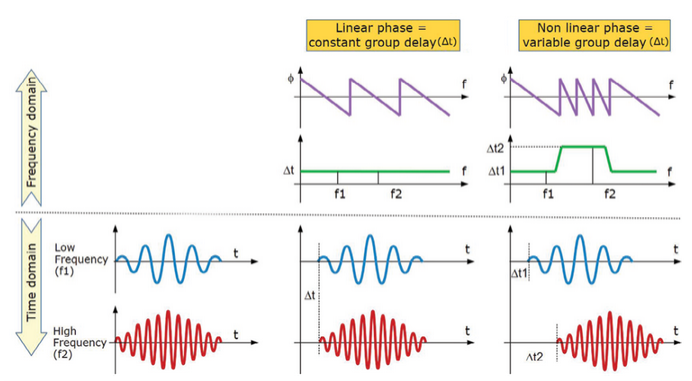

ref: https://circuitcellar.com/research-design-hub/group-delay-basics-more-filter-fun/

## FIR filter

 Definition: FIR filters are characterized by having a finite duration of the impulse response. The current output of an FIR filter is a weighted sum of the most **past input and current input** values.

Key Characteristics:

- Non-recursive: Only past input values (not past output values) are used to compute the current output.
- Stability: FIR filters are inherently stable as they do not rely on feedback, which can potentially amplify the filter’s response.
- Phase Characteristics: They can easily be designed to have a linear phase, which means the filter does not distort the phase of the signals passing through it. Using a linear phase filter in signal processing is advantageous when preserving the waveform shape of the signal is important.

$$y[n] = \sum_{k=0}^{M-1} h[k]x[n-k]$$

Linear vs non-linear phase

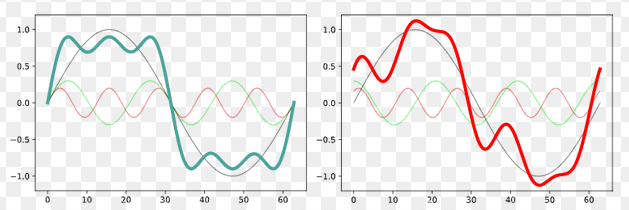

FIR block diagram

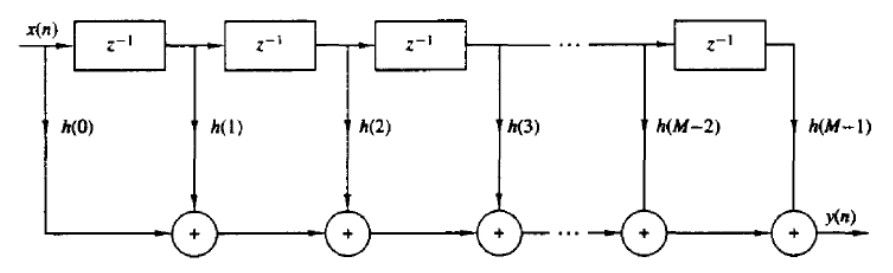

### Window Method
This is the simplest method (and the most common) for designing FIR filters. In this method, you start with an ideal impulse response (satisfying your specifications) and then window it to obtain a finite-length impulse response.

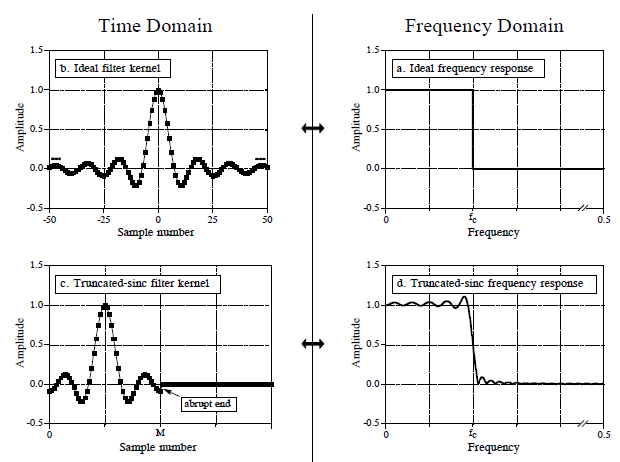

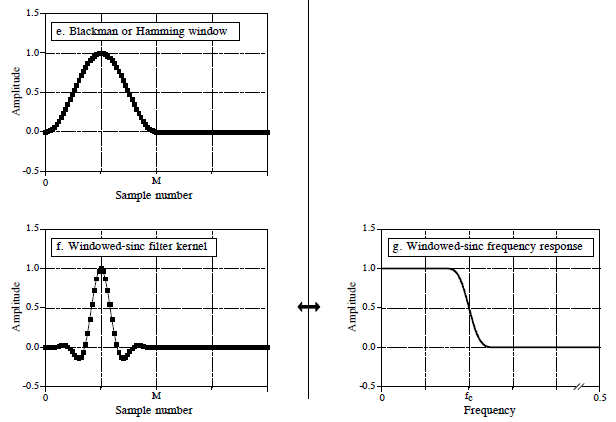

#### Coding

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def freqz_resp_list(b, a=np.array([1]), mode = 'dB', fs=1.0, n_pts = 1024, fsize=(6, 4)):
    """
    A method for displaying digital filter frequency response magnitude,
    phase, and group delay. A plot is produced using matplotlib

    freq_resp(self,mode = 'dB',Npts = 1024)

    A method for displaying the filter frequency response magnitude,
    phase, and group delay. A plot is produced using matplotlib

    freqz_resp(b,a=[1],mode = 'dB',Npts = 1024,fsize=(6,4))

        b = ndarray of numerator coefficients
        a = ndarray of denominator coefficents
     mode = display mode: 'dB' magnitude, 'phase' in radians, or 
            'groupdelay_s' in samples and 'groupdelay_t' in sec, 
            all versus frequency in Hz
     Npts = number of points to plot; default is 1024
    fsize = figure size; defult is (6,4) inches

    Mark Wickert, January 2015
    """
    if type(b) == list:
        # We have a list of filters
        N_filt = len(b)
    f = np.arange(0, n_pts) / (2.0 * n_pts)
    for n in range(N_filt):
        # Calculate the frequency response 'H' using signal.freqz. 'w' is the frequency vector in radians, b[n] and a[n] is numerator and denominator of each filter
        w,H = signal.freqz(b[n],a[n],2*np.pi*f)
        if n == 0:
            plt.figure(figsize=fsize)
        if mode.lower() == 'db':
            plt.plot(f*fs,20*np.log10(np.abs(H)))
            if n == N_filt-1:
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Gain (dB)')
                plt.title('Frequency Response - Magnitude')
        elif mode.lower() == 'amplitude':
            plt.plot(f*fs,np.abs(H))
            if n == N_filt-1:
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Amplitude')
                plt.title('Frequency Response - Magnitude')

        elif mode.lower() == 'phase':
            plt.plot(f*fs,np.angle(H))
            if n == N_filt-1:
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Phase (rad)')
                plt.title('Frequency Response - Phase')

        else:
            s1 = 'Error, mode must be "dB", "phase, '
            print(s1)

In [16]:

# length of the filter
n_taps = 101

# cutoff frequency is the frequency at which the power of the input signal is halved
# in otherwords, the frequency at which the power of the input signal is 0.5
fc = 2

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps,  fc , fs = fs)

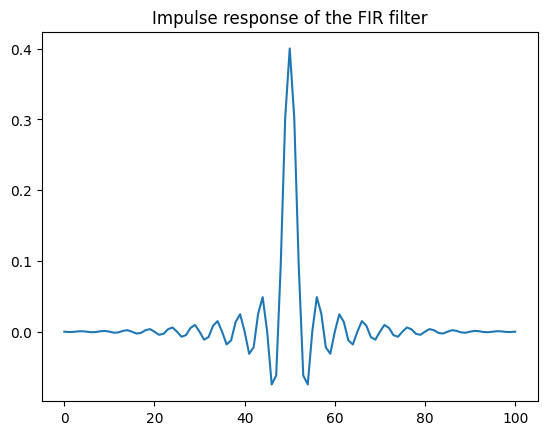

In [17]:
plt.plot(b)
plt.title("Impulse response of the FIR filter")
plt.show()

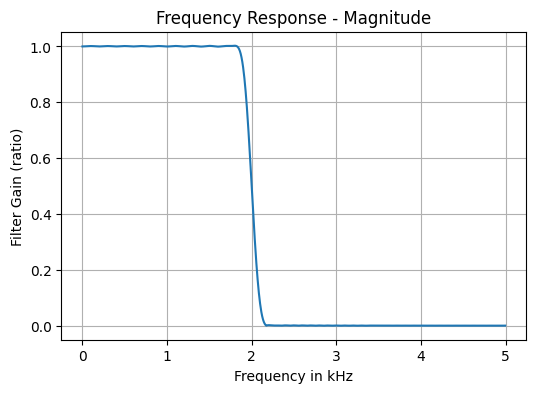

In [18]:
freqz_resp_list([b],mode = 'amplitude',fs=fs)


plt.ylabel(r'Filter Gain (ratio)')
plt.xlabel(r'Frequency in kHz')

plt.grid()

When designing digital filters, one of the key aspects that engineers and data scientists must consider is how the filter attenuates or amplifies signals at different frequencies. The measure of attenuation and amplification is typically expressed in decibels (dB). Decibels provide a logarithmic way to represent the ratio of two values, primarily power or intensity, which is particularly useful in filter design due to the wide range of power levels that filters must handle. To compare two signal power, $P_1$ and $P_2$ we can use ratio (attenuation or amplification) and also **bel**:

$$bel = log_{10} (\frac{P_1}{P_2})$$

$$decibel = dB  = 10 \cdot bel$$

For voltage:

$$dB  = 10 \cdot log_{10} (\frac{V_1^2}{V_2^2}) = 20 \cdot log_{10} (\frac{V_1}{V_2})$$

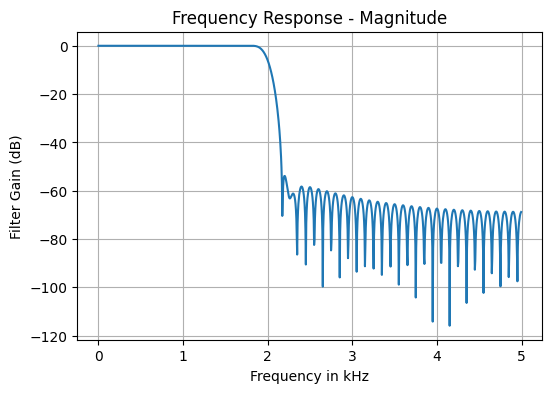

In [256]:
freqz_resp_list([b],mode = 'dB',fs=fs)


plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in kHz')

plt.grid()

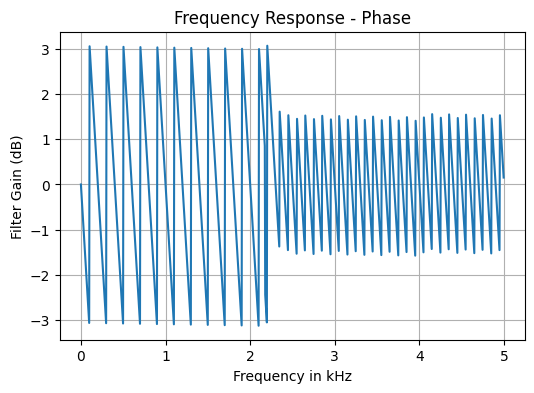

In [257]:
freqz_resp_list([b],mode = 'phase',fs=fs)


plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in kHz')

plt.grid()

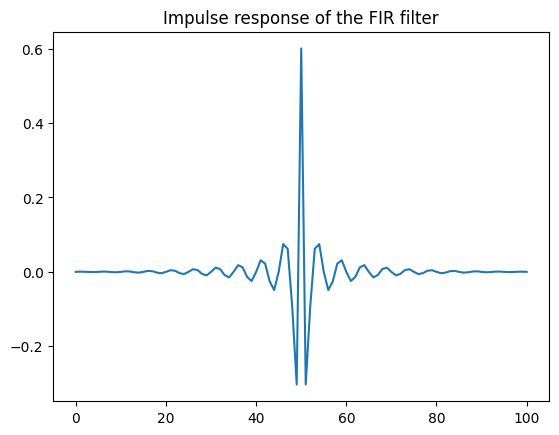

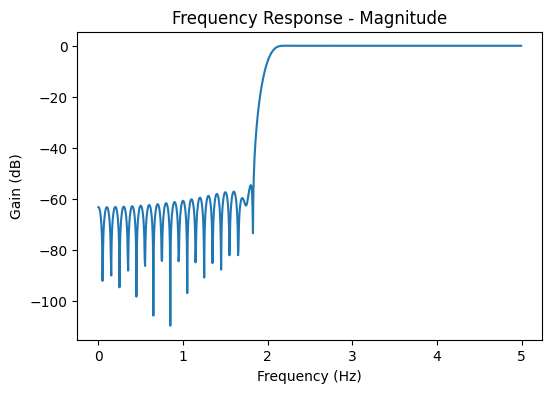

In [19]:

# high pass filter

# length of the filter
n_taps = 101

# cutoff frequency
fc = 2

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps,  fc , pass_zero=False, fs = fs)

plt.plot(b)
plt.title("Impulse response of the FIR filter")
plt.show()

freqz_resp_list([b],mode = 'dB',fs=fs)



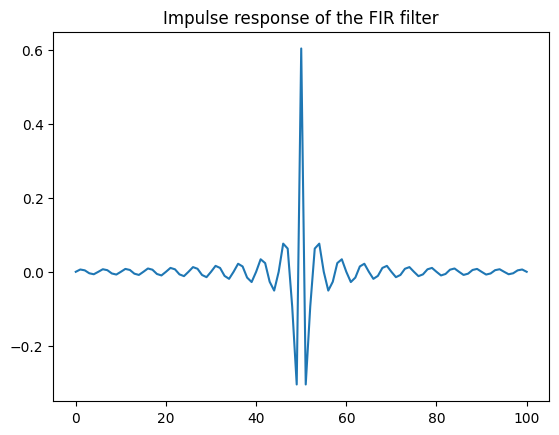

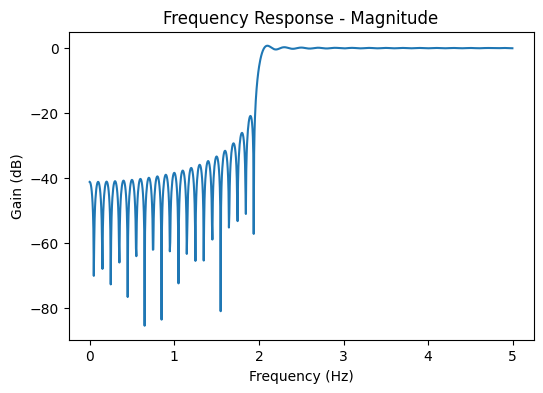

In [20]:

# high pass filter

# length of the filter
n_taps = 101

# cutoff frequency
fc = 2

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps, fc , pass_zero=False, window='boxcar', fs = fs)

plt.plot(b)
plt.title("Impulse response of the FIR filter")
plt.show()

freqz_resp_list([b],mode = 'dB',fs=fs)



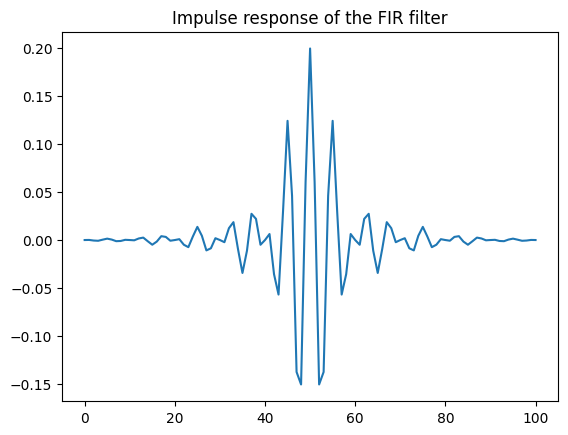

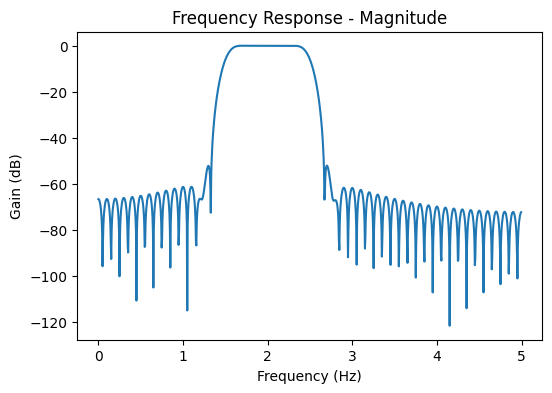

In [21]:
# band pass filter

# length of the filter
n_taps = 101

# cutoff frequency
f1, f2 = 1.5, 2.5

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps, [f1 ,  f2], pass_zero=False, fs = fs)

plt.plot(b)
plt.title("Impulse response of the FIR filter")
plt.show()

freqz_resp_list([b],mode = 'dB',fs=fs)



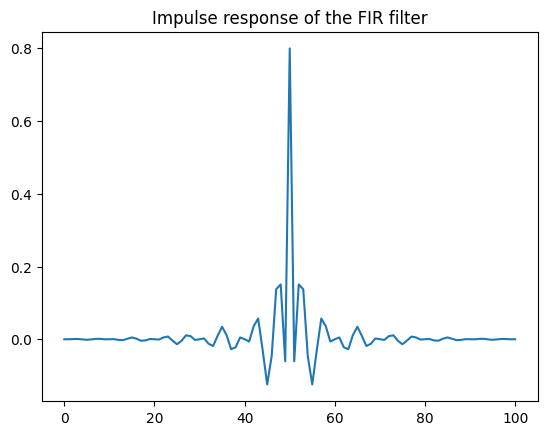

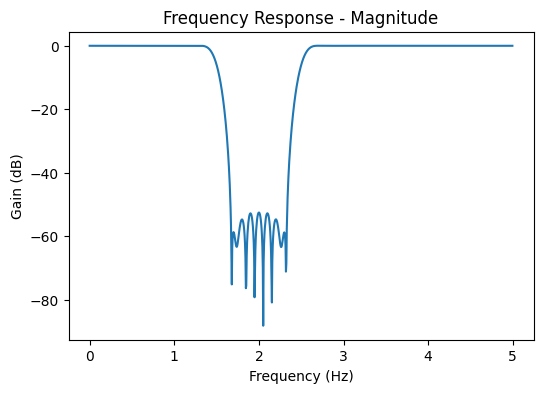

In [22]:
# band stop filter

# length of the filter
n_taps = 101

# cutoff frequency
f1, f2 = 1.5, 2.5

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps, [f1 ,  f2], fs = fs)

plt.plot(b)
plt.title("Impulse response of the FIR filter")
plt.show()

freqz_resp_list([b],mode = 'dB',fs=fs)



#### Filtering

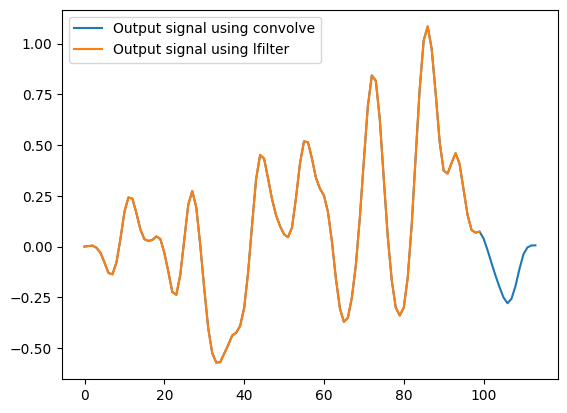

In [65]:
input_signal = np.random.randn(100)

# Design an FIR filter (example coefficients)
filter_order = 15
cutoff_freq = 0.2
filter_coeffs = signal.firwin(filter_order, cutoff_freq)

# Perform FIR filtering using convolve with appropriate edge handling
output_convolve = signal.convolve(input_signal, filter_coeffs, mode='full')

# Perform FIR filtering using lfilter
output_lfilter = signal.lfilter(filter_coeffs, [1.0], input_signal)

# Check if the results are the same

plt.plot(output_convolve, label='Output signal using convolve')
plt.plot(output_lfilter, label='Output signal using lfilter')
plt.legend()
plt.show()

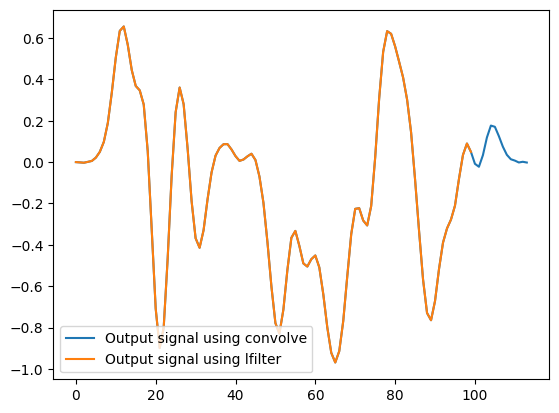

In [72]:
input_signal = np.random.randn(100)

# Design an FIR filter (example coefficients)
filter_order = 15
cutoff_freq = 0.2
filter_coeffs = signal.firwin(filter_order, cutoff_freq)

# Perform FIR filtering using convolve with appropriate edge handling
output_convolve = signal.convolve(input_signal, filter_coeffs, mode='full')

# Perform FIR filtering using lfilter
output_lfilter = signal.lfilter(filter_coeffs, [1.0], input_signal)

# Check if the results are the same

plt.plot(output_convolve, label='Output signal using convolve')
plt.plot(output_lfilter, label='Output signal using lfilter')
plt.legend()
plt.show()

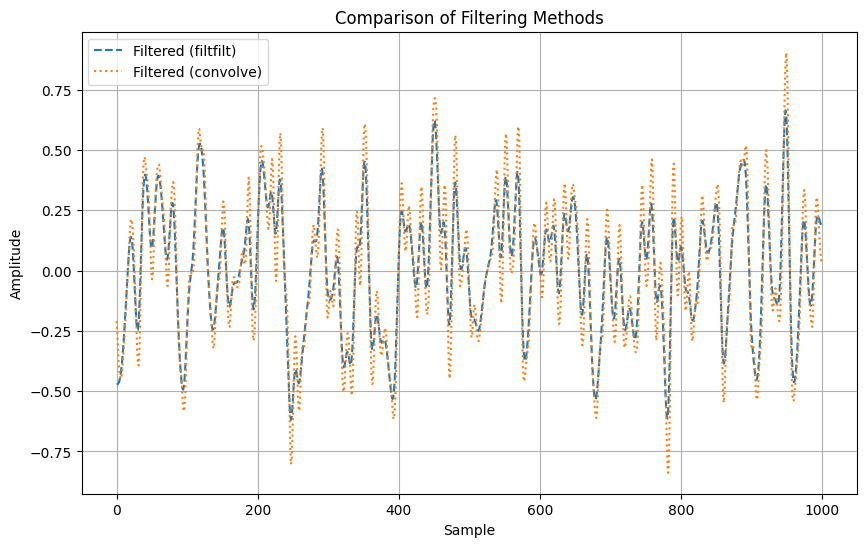

In [77]:
# Generate a random input signal

input_signal = np.random.randn(1000)

# Design an FIR filter (example coefficients)
filter_order = 15
cutoff_freq = 0.1
filter_coeffs = signal.firwin(filter_order + 1, cutoff_freq)

# Apply filtering using filtfilt
filtered_filtfilt = signal.filtfilt(filter_coeffs, [1.0], input_signal)

# Apply filtering using convolve (with appropriate edge handling)
filtered_convolve = signal.convolve(input_signal, filter_coeffs, mode='same') 

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

plt.plot(filtered_filtfilt, label='Filtered (filtfilt)', linestyle='--')
plt.plot(filtered_convolve, label='Filtered (convolve)', linestyle=':')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Comparison of Filtering Methods')
plt.legend()
plt.grid(True)
plt.show()

## IIR filter

Definition: IIR filters are characterized by an impulse response that lasts indefinitely. They utilize both **past inputs, current input and past outputs** to compute the current output.

Key Characteristics:

- Recursive: Uses feedback from its own output, which allows for a more compact representation and typically fewer parameters than an FIR filter for a similar performance.
- Stability: IIR filters can potentially become unstable if not designed carefully, especially in the presence of feedback.
- Phase Characteristics: They can introduce non-linear phase distortions unless specifically designed to avoid them.


$$y[n] = \sum_{k=0}^{M} b_kx[n-k] + \sum_{k=1}^{N} a_ky[n-k]$$

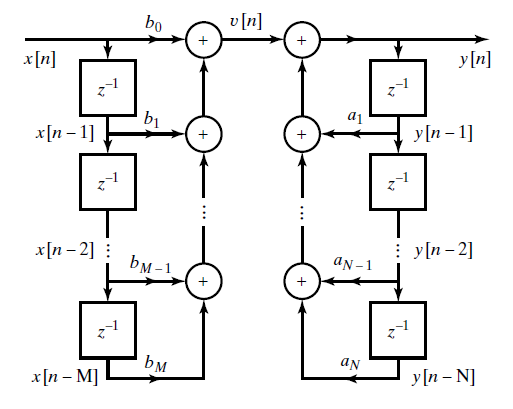

### Analog Prototyping

Analog prototyping in IIR (Infinite Impulse Response) filter design involves creating an analog filter with characteristics that closely resemble those of the desired digital filter. The term "Analog Prototyping" in the context of IIR filter design is used because it involves the initial design and development of a filter in the analog (continuous) domain that serves as a prototype or model for the desired digital filter.

Common types of filter include Butterworth, Chebyshev Type I, Chebyshev Type II and elliptic.

- Butterworth Filter:
    - Provides a maximally flat frequency response in the passband.
    - Smooth rolloff into the stopband with no ripple.
    - Suitable for applications where a flat passband response is desired.

- Chebyshev Type I Filter:
    - Features equiripple behavior in the passband.
    - Provides steeper rolloff than Butterworth but with passband ripple.
    - Suitable for applications requiring sharper transition and acceptable passband ripple.

- Chebyshev Type II Filter:
    - Exhibits equiripple behavior in the stopband.
    - Steeper stopband rolloff than Butterworth but with stopband ripple.
    - Suitable for applications needing sharp stopband transition and acceptable stopband ripple.

- Elliptic (Cauer) Filter:
    - Displays equiripple behavior in both passband and stopband.
    - Offers the sharpest transition but requires the highest filter order.
    - Suitable for applications requiring precise control of passband and stopband characteristics, even with increased complexity.

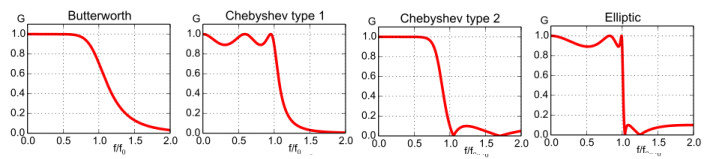

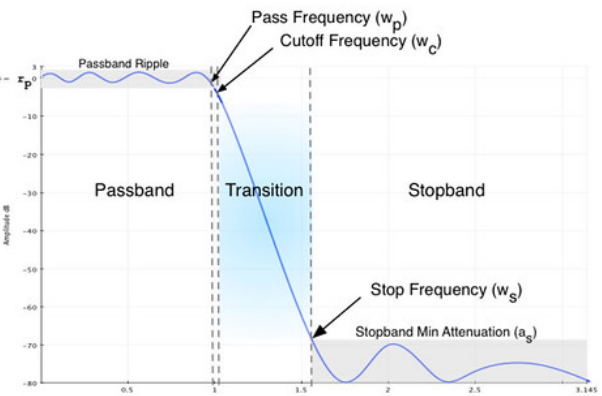

https://www.researchgate.net/figure/The-discrete-time-gain-with-Butterworth-Chebyshev-and-Elliptic-filters-8_fig2_341838935

### butterworth

(-100.0, 10.0)

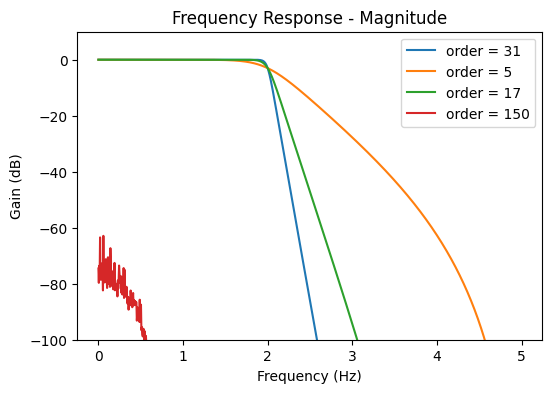

In [24]:
# IIR filter butterworth


# low pass filter
N1 = 31
N2 = 5
N3 = 17
N4 = 150
fc = 2
fs = 10

btype = 'low'

b1, a1 = signal.iirfilter(N1, fc, btype  = btype, ftype = 'butter', fs = fs)
b2, a2 = signal.iirfilter(N2, fc, btype  = btype, ftype = 'butter', fs = fs)
b3, a3 = signal.iirfilter(N3, fc, btype  = btype, ftype = 'butter', fs = fs)
b4, a4 = signal.iirfilter(N4, fc, btype  = btype, ftype = 'butter', fs = fs)



freqz_resp_list([b1, b2, b3, b4], [a1, a2, a3, a4], mode = 'dB', fs=fs)
plt.legend(['order = 31', 'order = 5', 'order = 17', 'order = 150'])
plt.ylim(-100, 10)


In [259]:
a3.max()

13.920523574804532

In [260]:
a4.max()

2168705477902003.8

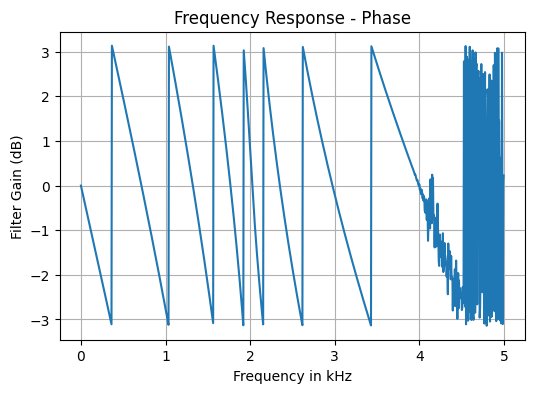

In [264]:
freqz_resp_list([b1],[a1],mode = 'phase',fs=fs)


plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in kHz')

plt.grid()

### chebyshev type 1

(-100.0, 10.0)

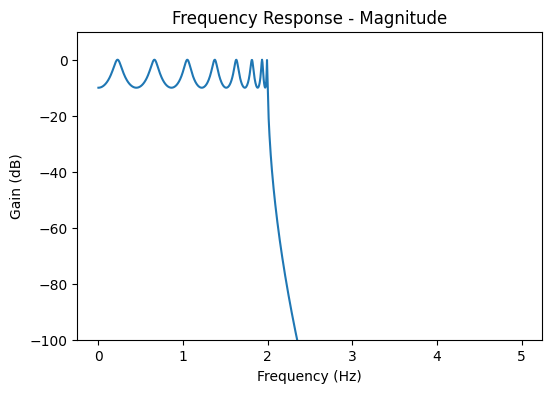

In [261]:
# IIR filter chebyshev type 1


# low pass filter
N1 = 16
fc = 2
fs = 10

# chebyshev filter has ripple in the passband
rp = 10

btype = 'low'



b1, a1 = signal.iirfilter(N1, fc/fs*2, btype  = btype, ftype = 'cheby1', rp = rp)

freqz_resp_list([b1], [a1], mode = 'dB', fs=fs)
plt.ylim(-100, 10)


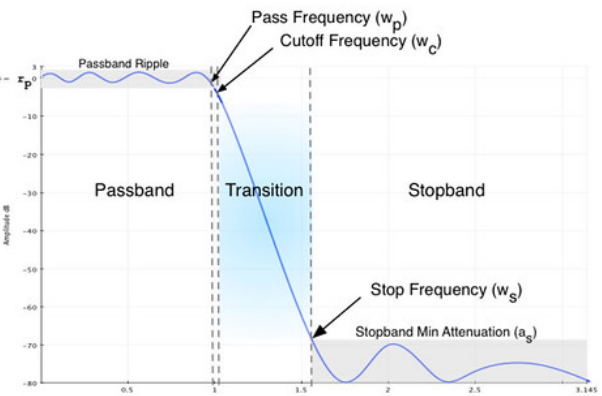

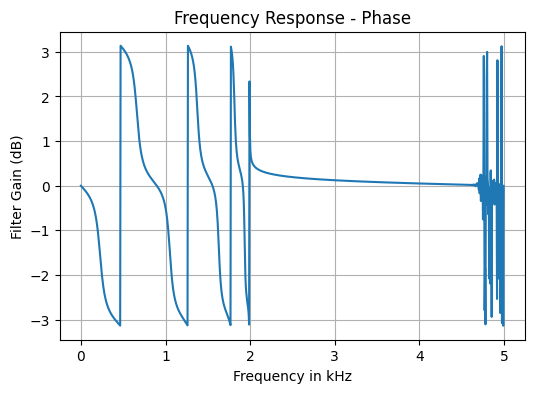

In [262]:
freqz_resp_list([b1],[a1],mode = 'phase',fs=fs)


plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in kHz')

plt.grid()

### chebyshev type 2

(-100.0, 10.0)

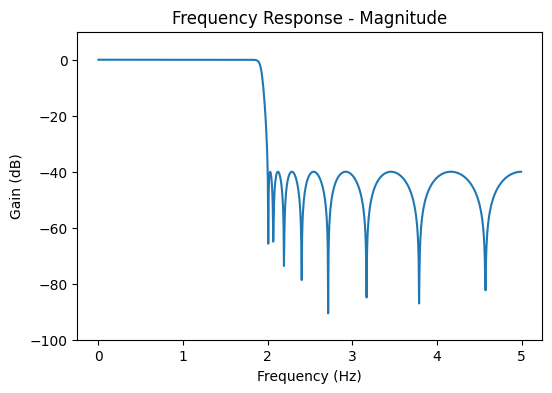

In [130]:
# IIR filter chebyshev type 2


# low pass filter
N1 = 16
fc = 2
fs = 10

# chebyshev filter has ripple in the passband
rs = 40

btype = 'low'



b1, a1 = signal.iirfilter(N1, fc/fs*2, btype  = btype, ftype = 'cheby2', rs = rs)

freqz_resp_list([b1], [a1], mode = 'dB', fs=fs)
plt.ylim(-100, 10)


### elliptic

(-100.0, 10.0)

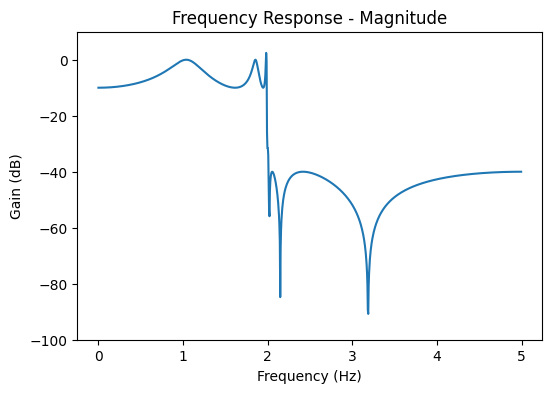

In [131]:
# IIR filter elliptic


# low pass filter
N1 = 16

fc = 2
fs = 10


# elliptic filter has ripple in the passband and stopband
rp = 10
rs = 40

btype = 'low'

b1, a1 = signal.iirfilter(N1, fc/fs*2, btype  = btype, ftype = 'ellip', rp = rp, rs = rs)

freqz_resp_list([b1], [a1], mode = 'dB', fs=fs)
plt.ylim(-100, 10)

    

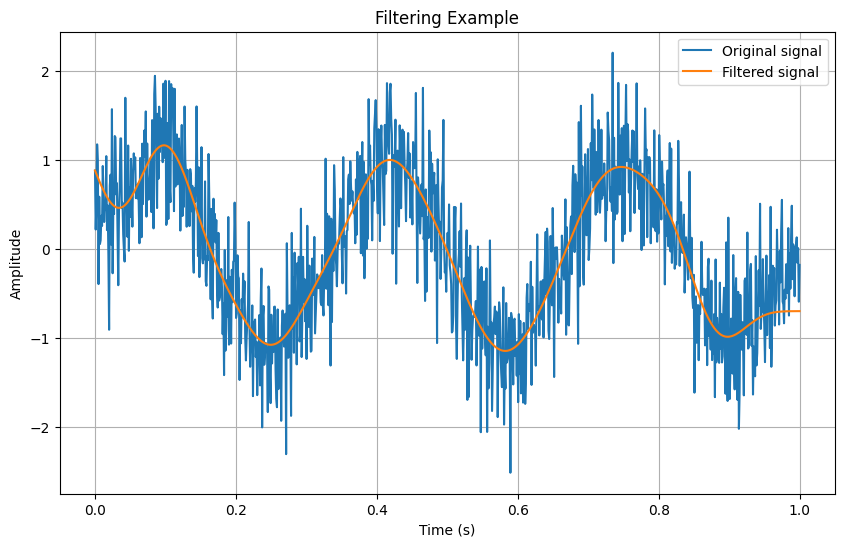

In [120]:
# filter example

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Generate a noisy input signal
np.random.seed(0)
n_samples = 1000
t = np.linspace(0, 1, n_samples)

# Generate a noisy input signal
x = np.sin(2 * np.pi * 3 * t) + 0.5 * np.random.randn(n_samples)

# Design a low-pass Butterworth filter
order = 8
fs = 1000
cutoff = 10
sos = signal.butter(order, cutoff / (fs / 2),  output = 'sos')

# Apply the filter to the noisy input signal
filtered_signal = signal.sosfiltfilt(sos, x)

# Plot the original and filtered signals

plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Original signal')
plt.plot(t, filtered_signal, label='Filtered signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtering Example')
plt.legend()
plt.grid(True)
plt.show()


## Summary


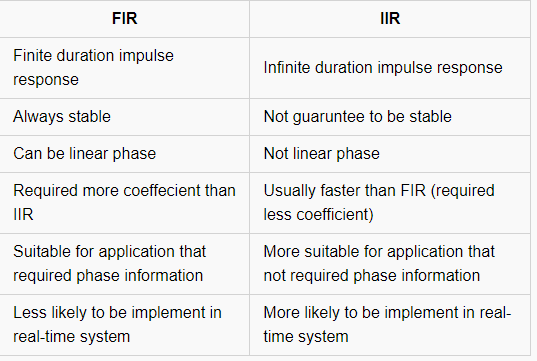

#### Comparison

(-100.0, 10.0)

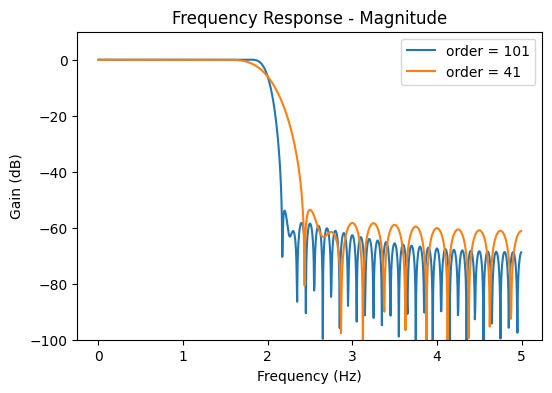

In [284]:

# high pass filter

# length of the filter
n_taps = 101
n_taps2 = 41
# cutoff frequency
fc = 2

# sampling frequency
fs = 10

# 2 * fc / fs is the normalized cutoff frequency
b = signal.firwin(n_taps, 2 * fc / fs)
b2 = signal.firwin(n_taps2, 2 * fc / fs)


freqz_resp_list([b, b2], [1,1],mode = 'dB',fs=fs)
plt.legend(['order = 101', 'order = 41'])
plt.ylim(-100, 10)


(-100.0, 10.0)

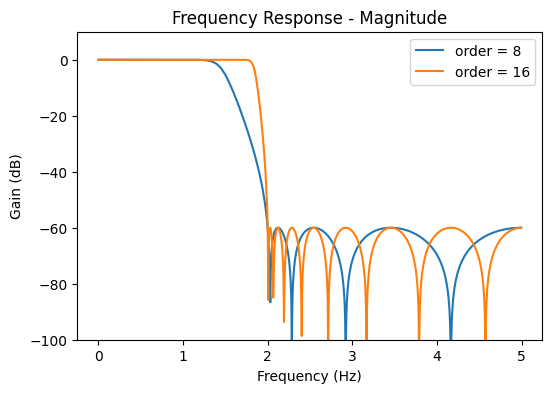

In [282]:
# IIR filter chebyshev type 2


# low pass filter
N1 = 8
N2 = 16
fc = 2
fs = 10

# chebyshev filter has ripple in the passband
rs = 60

btype = 'low'



b1, a1 = signal.iirfilter(N1, fc/fs*2, btype  = btype, ftype = 'cheby2', rs = rs)
b2, a2 = signal.iirfilter(N2, fc/fs*2, btype  = btype, ftype = 'cheby2', rs = rs)

freqz_resp_list([b1, b2], [a1, a2], mode = 'dB', fs=fs)
plt.legend(['order = 8', 'order = 16'])
plt.ylim(-100, 10)


# Short-time Fourier transform (STFT)

The Short-Time Fourier Transform (STFT) is a powerful signal processing technique employed in various fields, including audio analysis, speech processing, and communication systems. Unlike the traditional Fourier Transform, which analyzes a signal in its entirety, the STFT breaks down a signal into smaller, overlapping segments, allowing for a more localized and dynamic analysis of its frequency content over time. This temporal localization makes the STFT particularly useful in capturing transient events and changes in a signal's characteristics. By applying a window function to each segment, the STFT strikes a balance between time and frequency resolution, offering insights into both the time and frequency domains simultaneously.

$$
STFT_f(\tau, \mu) = ∫^{∞}_{-∞} f(t) e^{-j2πμt} \bar{g}(t-\tau) dt
$$

where $g(t)$ is the **kernel function** or **windows function** that satify $\int^{∞}_{-∞} g(t) dt = 1$.

Windows function lists: https://en.wikipedia.org/wiki/Window_function

Note: if you choose $g(t)$ to be a guassian, then STFT has a specific name, **Gabor Transform**


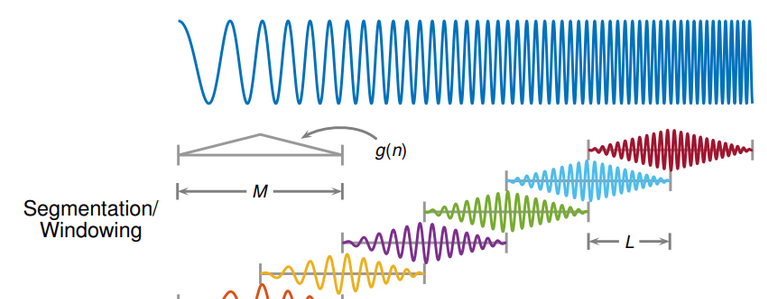

ref https://in.mathworks.com/help/signal/ref/stft.html

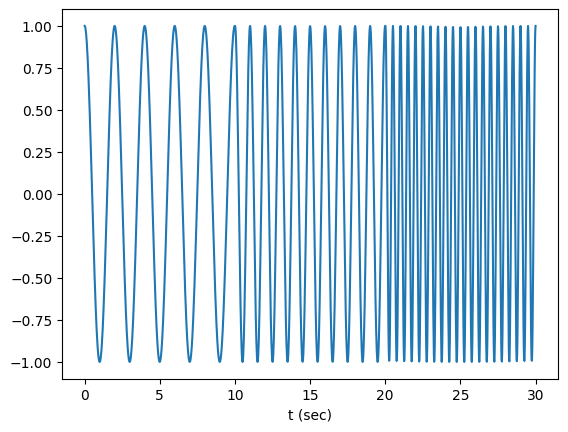

In [295]:
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import numpy as np

max_t = 30
number_of_samples = 1500
fs = number_of_samples/max_t
t1 = np.linspace(0, 10, 500)
t = np.linspace(0, max_t, number_of_samples)
f1 = 0.5
f2 = 1
f3 = 2

a =  np.cos(2 * np.pi * f1 * t1)
b =  np.cos(2 * np.pi * f2 * t1)
c =  np.cos(2 * np.pi * f3 * t1)

signal_vary = np.concatenate([a, b, c], axis = 0)


plt.plot(t, signal_vary)
plt.xlabel('t (sec)')
plt.show()

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

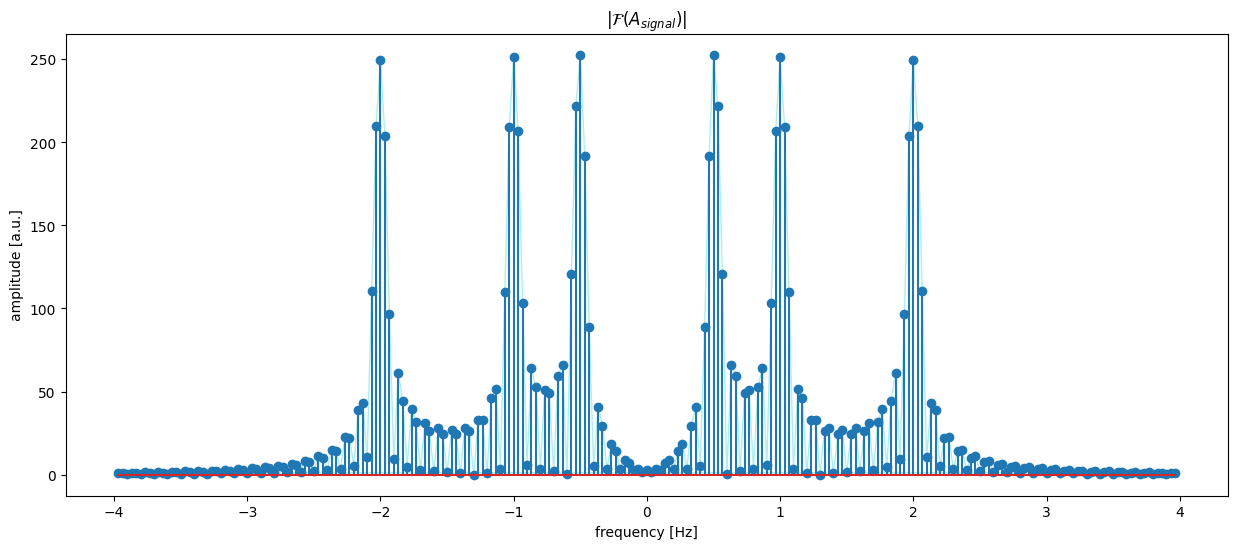

In [296]:
import scipy.fft

spectrum = scipy.fft.fft(signal_vary)
frequencies = scipy.fft.fftfreq(len(signal_vary), 1/fs)

fig=plt.figure(2, figsize=(15,6))
plt.plot(frequencies[(frequencies<4)&(frequencies>-4)], np.abs(spectrum)[(frequencies<4)&(frequencies>-4)], lw=1.0, c='paleturquoise')
plt.stem(frequencies[(frequencies<4)&(frequencies>-4)], np.abs(spectrum)[(frequencies<4)&(frequencies>-4)])
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

You can see three peak according to three frequency. From the graph you know that there are three frequency in the signal, but you dont know when the frequency component occur. We can get more knowledge by using STFT.

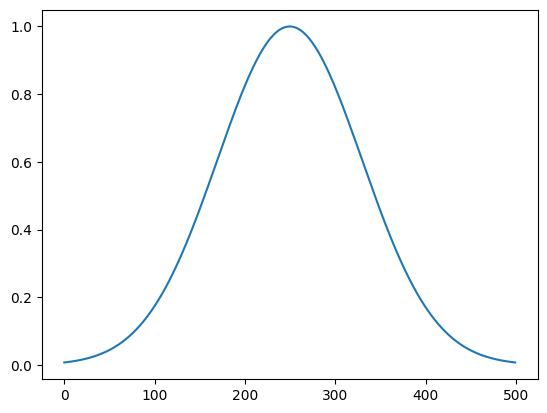

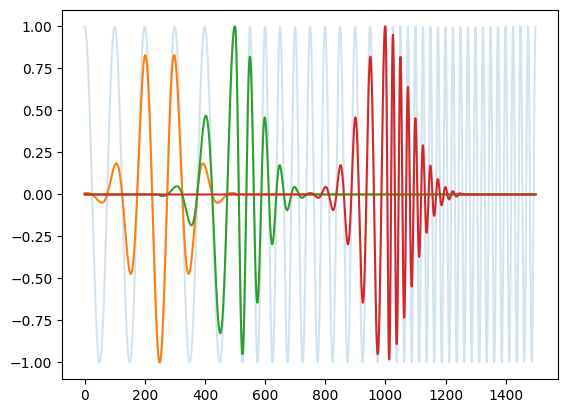

In [297]:
from scipy.signal.windows import gaussian

w = gaussian(500, std=80, sym=True)

plt.plot(w)

plt.show()
w_pad = np.zeros(len(signal_vary))
w_pad[:500] = w
plt.plot(signal_vary, alpha = 0.2)
plt.plot(w_pad * signal_vary)

w_pad = np.zeros(len(signal_vary))
w_pad[250:750] = w
plt.plot(w_pad * signal_vary)

w_pad = np.zeros(len(signal_vary))
w_pad[750:1250] = w
plt.plot(w_pad * signal_vary)

## Spectrogram

#### Magnetude spectrogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


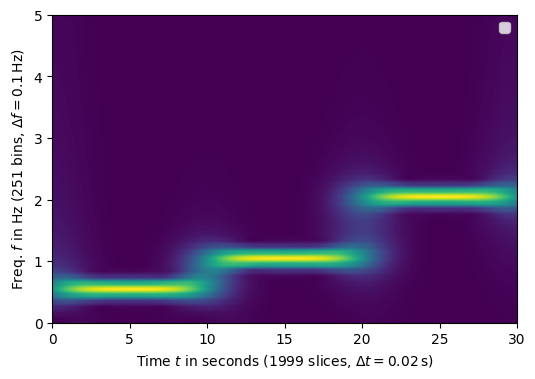

In [302]:
from scipy import signal

sft = signal.ShortTimeFFT(w, fs = fs, hop=1, scale_to='magnitude')

Zxx = sft.stft(signal_vary)
t_lo, t_hi, f_lo, f_hi = sft.extent(number_of_samples)


fig1, ax1 = plt.subplots(figsize=(6., 4.))

ax1.imshow(np.abs(Zxx), origin='lower', aspect='auto',extent=(t_lo,t_hi,f_lo,f_hi), cmap='viridis')

ax1.set(xlabel=f"Time $t$ in seconds ({sft.p_num(number_of_samples)} slices, " +
              rf"$\Delta t = {sft.delta_t:g}\,$s)",
       ylabel=f"Freq. $f$ in Hz ({sft.f_pts} bins, " +
              rf"$\Delta f = {sft.delta_f:g}\,$Hz)",
       xlim=(0, 30), ylim = (0,5))

ax1.legend()

Three peaks are observed, each corresponding to distinct frequency components. It is noteworthy that, in contrast to the Fourier Transform, these peaks are situated at different points along the time axis.

#### Power Spectogram


A power spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. Spectrogram essentially corresponds to computing the squared magnitude of the short-time Fourier transform (STFT).

$$
\text{power Spectrogram}(\tau, \mu) = |STFT(\tau, \mu)|^2
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


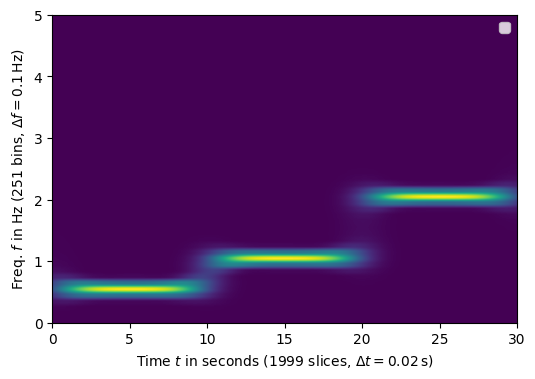

In [299]:
from scipy import signal
from scipy.signal.windows import gaussian

w = gaussian(500, std=80, sym=True)
sft = signal.ShortTimeFFT(w, fs = fs, hop=1)

Zxx = sft.spectrogram(signal_vary)
t_lo, t_hi, f_lo, f_hi = sft.extent(number_of_samples)


fig1, ax1 = plt.subplots(figsize=(6., 4.))

ax1.imshow(np.abs(Zxx), origin='lower', aspect='auto',extent=(t_lo,t_hi,f_lo,f_hi), cmap='viridis')

ax1.set(xlabel=f"Time $t$ in seconds ({sft.p_num(number_of_samples)} slices, " +
              rf"$\Delta t = {sft.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({sft.f_pts} bins, " +
              rf"$\Delta f = {sft.delta_f:g}\,$Hz)",
        xlim=(0, 30), ylim = (0,5))

ax1.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


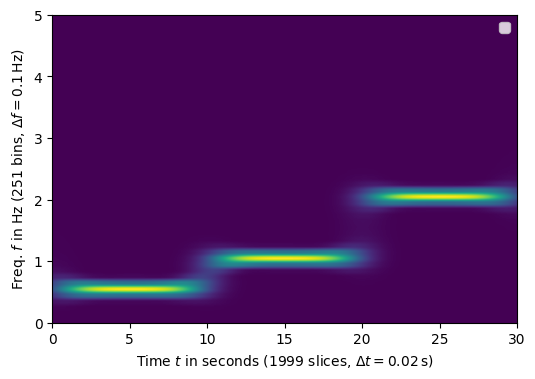

In [300]:
from scipy import signal
from scipy.signal.windows import gaussian

w = gaussian(500, std=80, sym=True)
sft = signal.ShortTimeFFT(w, fs = fs, hop=1, scale_to = 'magnitude')

Zxx = sft.stft(signal_vary)
t_lo, t_hi, f_lo, f_hi = sft.extent(number_of_samples)


fig1, ax1 = plt.subplots(figsize=(6., 4.))

ax1.imshow(np.abs(Zxx)**2, origin='lower', aspect='auto',extent=(t_lo,t_hi,f_lo,f_hi), cmap='viridis')

ax1.set(xlabel=f"Time $t$ in seconds ({sft.p_num(number_of_samples)} slices, " +
              rf"$\Delta t = {sft.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({sft.f_pts} bins, " +
              rf"$\Delta f = {sft.delta_f:g}\,$Hz)",
        xlim=(0, 30), ylim = (0,5))

ax1.legend()

# Wavelet transform

Time and frequency resolutions of various transformations are illustrated. The blocks' size and orientation show the ability to locate information in both the time and frequency domains. The original time-series exhibits high time-domain resolution but lacks frequency-domain resolution, enabling the distinction of minute features solely in the time-domain. In contrast, the Fourier Transform excels in frequency-domain resolution while lacking time-domain resolution. The Short Time Fourier Transform strikes a balance, offering a moderate resolution in both frequency and time domains.

As for the Wavelet Transform, it exhibits a trade-off. 

- For low-frequency values, it attains high frequency-domain resolution but low time-domain resolution. 
- For high-frequency values, it achieves high time-domain resolution but low frequency-domain resolution. 

In essence, the Wavelet Transform optimizes resolution based on the scales where time-dependent or frequency-dependent features are most relevant.



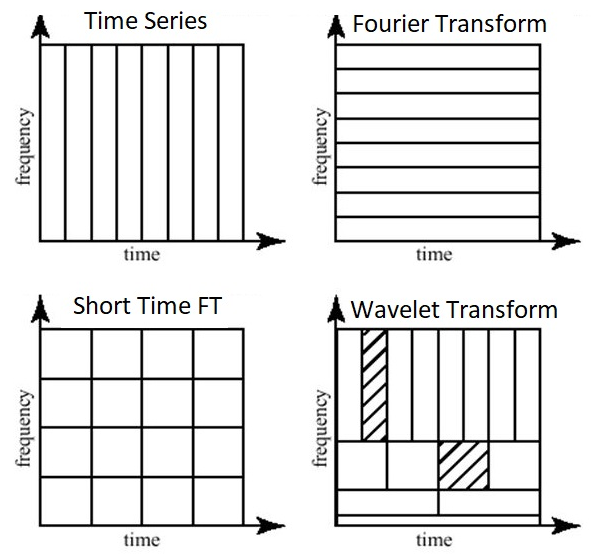

https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

Wavelets extend the concepts in Fourier analysis to more general orthogonal
bases, and partially overcome the uncertainty principle discussed above by exploiting a multi-resolution decomposition. This multi-resolution approach enables different time and frequency fidelities in different frequency bands, which is particularly useful for decomposing complex signals that arise from multi-scale processes such as are found in climatology, neuroscience, epidemiology, finance, and turbulence. Images and audio signals are also amenable to wavelet analysis.

The basic idea in wavelet analysis is to start with a function $ψ(t)$, known as the mother wavelet, which satify $\int^{∞}_{-∞} ψ(t) dt = 0$. Then from the mother wavelet, we generate a family of scaled and translated versions of the function:

$$
ψ_{a,b}(t) = \frac{1}{\sqrt{a}}ψ\Bigl( \frac{t-b}{a} \Bigr)
$$

The parameters a and b, which is **continuous number**, are responsible for scaling and translating the function ψ, respectively.

Below is the example of Haar wavelet
$$
ψ(t)
\begin{cases}
  &1 &\text{for} \; 0 ≤ t < 1/2, \\    
  &-1 &\text{for}\; 1/2 ≤ t < 1, \\
  & 0 &\text{otherwise}
\end{cases}
$$

Wavelet scaling animation: https://www.youtube.com/shorts/cK58F5orBf0

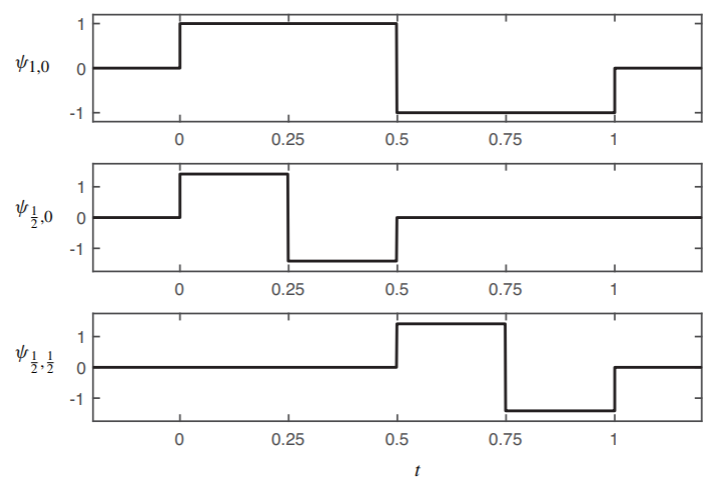

Similar to fourier transform, **continuous wavelet transform (CWT)**, is given by

$$
\mathcal{W}_f(a,b) = ∫_{-∞}^∞ f(t) \bar{ψ}_{a,b}(t) dt
$$


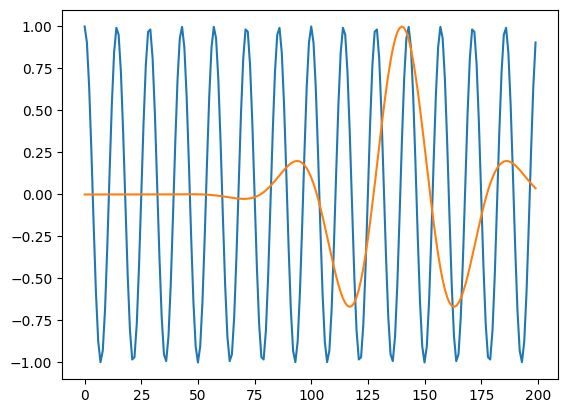

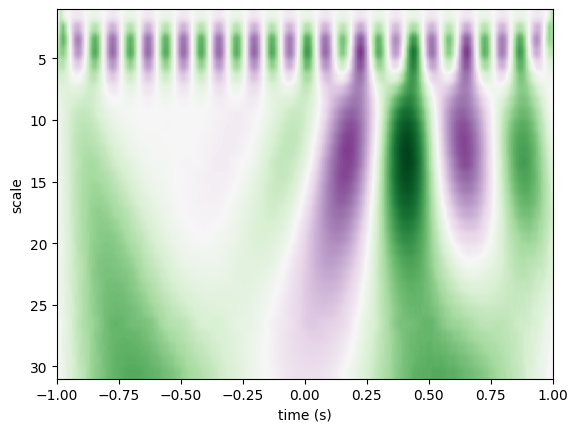

In [1]:
import pywt

import numpy as np

import matplotlib.pyplot as plt

min_time = -1
max_time = 1
number_of_samples = 200
fs = number_of_samples/(max_time-min_time)
t = np.linspace(min_time, max_time, number_of_samples, endpoint=False)

a = np.cos(2 * np.pi * 7 * t)
b = np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))

sig  = a +b+1

plt.plot(a)
plt.plot(b)
plt.show()

min_scale = 1
max_scale = 31
widths = np.arange(min_scale, max_scale)

cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh', sampling_period = 1/fs)

plt.imshow(cwtmatr, extent=[min_time, max_time, max_scale, min_scale], cmap='PRGn', aspect='auto',

           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.ylabel('scale')
plt.xlabel('time (s)')
plt.show() 

Spectrogram in wavelet usually called: **Scaleogram**

Since wavelet is not sine and cosine, they use the term scale since the results came from adjust the time scale of the mother wavelet. If you want the information of frequency, it is possible to convert scales to pseudo-frequencies by using the center frequency (average frequency) of the mother wavelet

$$
f_a = \frac{f_c}{a}
$$

where $f_a$ is the pseudo-frequency, $f_c$ is the central frequency of the Mother wavelet and a is the scaling factor.

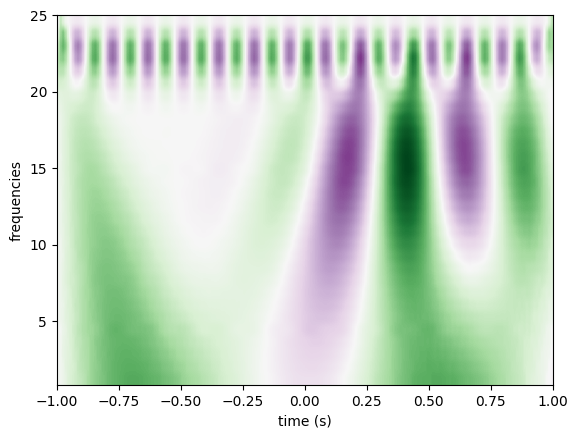

In [19]:
frequencies = pywt.scale2frequency('mexh',widths) *fs

cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh', sampling_period = 1/fs)

plt.imshow(cwtmatr, extent=[min_time, max_time, frequencies[-1], frequencies[0]], cmap='PRGn', aspect='auto',

           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.ylabel('frequencies')
plt.xlabel('time (s)')
plt.show() 

For **discrete wavelet transform (DWT)**, the famlily of wavelet is given by

$$
ψ_{j,k}(t) = \frac{1}{\sqrt{a^j}}ψ\Bigl( \frac{t-kb^j}{a^j} \Bigr)
$$

The parameters j and k, which is **integer**, are responsible for scaling and translating the function ψ, respectively. The parameter a and b will be set to 2 (shifted and scaled by powers of 2).

$$
ψ_{j,k}(t) = \frac{1}{\sqrt{2^j}}ψ\Bigl( \frac{t-k2^j}{2^j} \Bigr)
$$

and DWT can be written as

$$
\mathcal{W}_f(j,k) = ∫_{-∞}^∞ f(t) \bar{ψ}_{j,k}(t) dt
$$

By scaling the mother wavelet by parameter $j$ you can view this as a **level**.

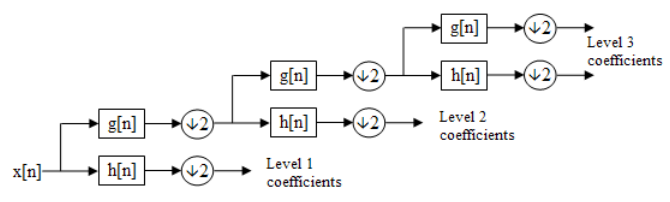

https://en.wikipedia.org/wiki/Discrete_wavelet_transform

Each level will going to operation with $h[n]$. For $h[n]$ is dilated, reflected, and normalized version of the mother wavelet. For level $j$, the $j$ is fixed, $ψ_{j,k}(t)$ is the function of $k$ only. To compare with the figure above, you can view $h[n]$ as $h[k]$.

$$
h[k] = \frac{1}{\sqrt{2^j}}ψ\Bigl( \frac{t-k2^j}{2^j} \Bigr)
$$

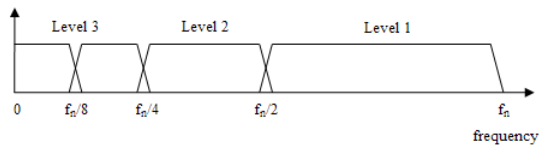

https://en.wikipedia.org/wiki/Discrete_wavelet_transform

For the first level, the information that you get is more precise in time domain than the higher level, but less precise in frequency domain.

## Application

- Spectrogram of Heartbeat sound signal.

![spec_hsound.png](pictures/spec_hsound.png)

ref image: https://www.researchgate.net/figure/Spectrogram-of-Heartbeat-sound-signal_fig4_337050256

- Spectrogram of sleep stage

![spec_eeg.png](pictures/spec_eeg.png)

ref image: https://www.eurekalert.org/multimedia/875892

- Spectrogram as preprocessing for deep learning input (Heart Sound Classification)

![spec_features.png](pictures/spec_features.png)

ref image: https://www.mdpi.com/2076-3417/13/21/11942

# Empirical mode decomposition (EMD)

EMD is a technique for decomposing a signal into intrinsic mode functions (IMFs), which can reveal simple oscillatory modes hidden in the signal. This method is particularly effective for non-linear and non-stationary data, which are common in real-world scenarios. It adapts to the data itself, unlike Fourier or wavelet transforms that rely on predefined bases such as sine and cosine waves. Using the EMD method, any complicated data set can be decomposed into a finite and often small number of components. They can be described as intrinsic mode functions (IMF).

- The first IMF usually carries the most oscillating (high-frequency) components, it can be rejected to remove high-frequency components (e.g., random noise).
- As the name "Empirical", it mean that the method is depend on data (adaptive), unlike fourier or wavelet transform that have predefined basic (eg. sine and cosine wave).

An intrinsic mode function (IMF) is defined as a function that satisfies the following requirements:

1. In the whole data set, the number of extrema and the number of zero-crossings must either be equal or differ at most by one.
2. At any point, the mean value of the envelope defined by the local maxima and the envelope defined by the local minima is zero.

You can get many IMF before it reach the stopping criteria that the residual of the signal is monotonic function.

For more detail step by step computation and **Visualization**: https://towardsdatascience.com/decomposing-signal-using-empirical-mode-decomposition-algorithm-explanation-for-dummy-93a93304c541

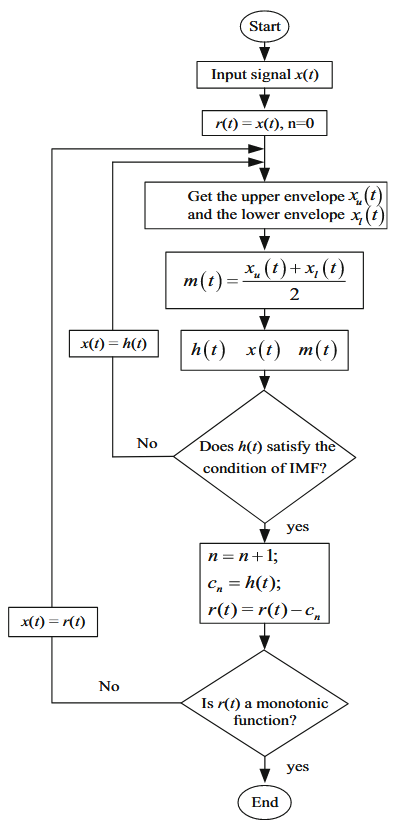

ref: https://link.springer.com/article/10.1007/s11042-017-5586-9

In practice the IMF condition is compute as

$$
\sum \frac{(h(t) - x(t))^2}{x(t)^2} < \epsilon
$$

$\epsilon$ usually set as 0.2


In [7]:
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

T = np.linspace(0, 1, 100)

S = np.sin(2*2*np.pi*T)
R = np.sin(4*2*np.pi*T)
signal = S + R
# simple, parabol
emd = EMD(extrema_detection='simple', std_thr  = 0.2, range_thr = 0.001)

IMFs = emd.emd(signal)

IMFs.shape

(3, 100)

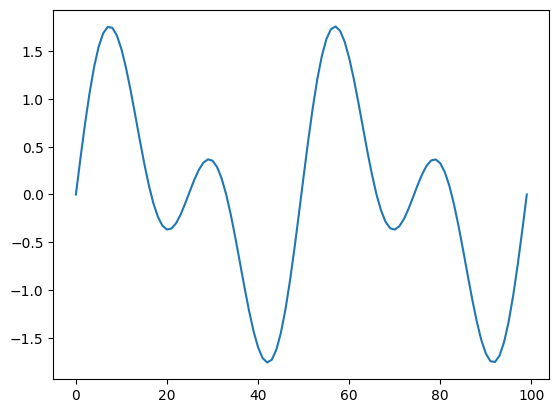

In [8]:
plt.plot(signal)

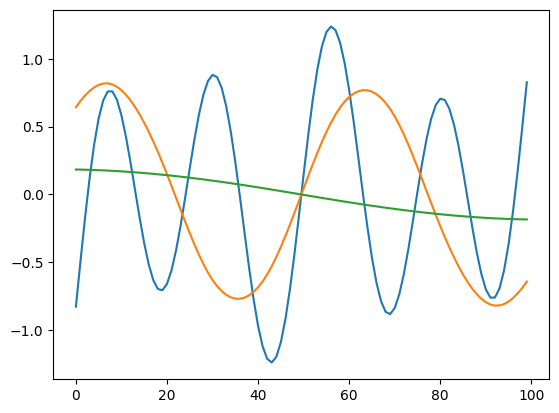

In [10]:
plt.plot(IMFs[0]) # First IMF
plt.plot(IMFs[1]) # Second IMF
plt.plot(IMFs[2]) # Residual
